 <h1> P3_01 Nettoyage des données</h1>

### 1.1 Contexte

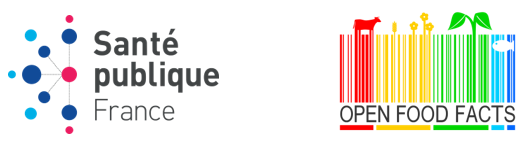



1) Traiter le jeu de données, en :

Réfléchissant à une idée d’application.
Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d’application.
Nettoyant les données en :
mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
Automatisant ces traitements pour éviter de répéter ces opérations

2) Tout au long de l’analyse:
produire des visualisations afin de mieux comprendre les données.
Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

3) Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. 
Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Justifier votre idée d’application.
Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

livrables:
    Un notebook du nettoyage des données (non cleané, pour comprendre votre démarche). 
Un notebook d’exploration comportant une analyse univariée, multivariée, une réduction dimensionnelle, ainsi que les différentes questions de recherches associées (non cleané, pour comprendre votre démarche).
Une présentation, à utiliser en support pour la soutenance, comprenant :
La présentation de votre idée d’application.
Les opérations de nettoyage effectuées.
La description et l'analyse univariée des différentes variables importantes avec les visualisations associées.
L’analyse multivariée et les résultats statistiques associés, en lien avec votre idée d’application.
3 observations solidement étayées (graphes et/ou tests statistiques à l’appui au besoin) évaluant la pertinence et la faisabilité de votre application.
La synthèse des différentes conclusions sur la faisabilité de votre projet.

-  définitions des [variables](https://world.openfoodfacts.org/data/data-fields.txt) repris dans le fichier data-fields

### 1.1.1 idée d'application retenue :  Manger sainement pour éviter la prise de poids.

Pour perdre du poids, il est nécessaire de réduire très progressivement la quantité d’énergie absorbée.

Des prescriptions diététiques vous permettront de réduire la quantité d’énergie que vous consommez. Pour cela, les professionnels (médecin nutritionniste ou diététicien)  réalisent une enquête alimentaire afin d’évaluer vos habitudes alimentaires.

L'idée de l'application serait: **Mieux vaut prévenir que guérir !**\
Avant de prendre du poids suite à de mauvaises habitudes alimentaires et de devoir consulter des professionnels pour perdre ces kilos superflus, l'application vous propose quelques bonnes habitudes alimentaires pour les éviter autant que possible.

Pratiquement : 
Alors qu'il fait ses courses, le client scanne le code bar du produit qu'il a sélectionné et l'application lui propose le(s) produit(s) équivalents contenant le moins de graisse et de sucre  par 100 g ou 100ml .


### 1.2 Librairies

pandas\
numpy\
matplotlib\
seaborn

### 1.3 Import

In [1]:
import os,sys,time

from collections import Counter
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import decomposition
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

### ## 1.4 Graphique et options

In [2]:
sns.set()

In [3]:
#pd.set_option('display.max_columns',250)
## pas de limite de largeur maxi des colonnes affichées
pd.set_option('display.max_colwidth',None)
#pd.set_option('display.max_rows',250)
# pas de limite pour le nombre maxi de colonnes affichées
pd.set_option('display.max_columns', None ) 
# pas de limite pour le nombre maxi de lignes affichées
pd.set_option('display.max_rows', None )

### 1.5 Chargements des données

In [4]:
## fonction qui ajoute 2 lignes à la fonction describe()  (le type de données et le nb de valeurs null)

def detail (df):
    
    nb_li = df.index.size                                                                    ## nombre de lignes
    nb_col = df.columns.size                                                                 ## nombre de colonnes
    tot = nb_li*nb_col                                                                       ## taille totale de la df
    info = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'})                                ## ajout le dtypes de chaque colonne et renomme index en Type  dans la dataframe info
    info = info.append(pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}))             ##  ajout la somme des null de chaque colonne et renomme l'index en null dans la dataframe info
    inf_data = df.describe(include='all')                                                    ## résultat de la commande describe(include('all')) stocké dans inf_data
    info= info.append(inf_data)                                                              ## ajout de inf_data a info
    return info

In [5]:
def missing_values(df):
    ''' affiche le pourcentage de valeurs manquantes par colonne trié en ordre ascendant'''
    
    result=((df.isna().sum()/df.shape[0])*100).sort_values(ascending=True)
    print(result)


In [6]:
## affiche le nombre de lignes , de colonnes , la taille totale , le nomnbre et le % de cellules manquantes

def cont(df):
    # nombre de lignes et colonnes
    nb_raw,nb_col=df.shape
    # nombre de valeurs manquantes
    val_na=df.isna().sum().sum()
    # % de données manquantes
    ratio_na=round(df.isna().sum().sum()/(nb_raw*nb_col)*100,2)
    print('taille totale du jeu de donnees :' ,nb_raw*nb_col)
    print() 
    print('nombre de lignes :',nb_raw,'                        nombre de colonnes :', nb_col)
    print()      
    print('nombre de valeurs manquantes :',val_na,'          % de valeurs manquantes :', ratio_na)

In [7]:
### print qty variable per type et  ratio for each type

def type_var(df):
    ''' affiche le % de valeurs manquantes par colonne trié en ascendant pour les colonnes de la dataframe '''
    print("Variables")
    print('---------')
    nb=df.dtypes.value_counts()
    nb_tot=nb.sum()
    pourcentage=round((100*nb/nb_tot),2)
    table=pd.concat([nb,pourcentage],axis=1)
    table.columns=[ 'Nombre' , '% ']
    display(table[table['Nombre']!=0]
    .sort_values('% ',ascending= False))
    

In [8]:
### print headmap avec les valeurs manquantes
def viz_na(df):
    plt.figure(figsize=(25,8))
    ax = sns.heatmap(df.isna(),cmap="Blues",cbar=False)
    plt.title('Visualisation des valeurs manquantes ',font='Arial',fontsize=24)
    plt.show()


In [9]:
## répertoire de notre fichier

data='C:/Users/serge/oneDrive/Documents/Documents/DATA SCIENTIST/P3/'
os.listdir(data)

['.ipynb_checkpoints',
 '.~lock.présentation_P3.pptx#',
 'data',
 'data-fields.txt',
 'data_P3.csv',
 'fr.openfoodfacts.org.products.csv',
 'p3-checkpoint.ipynb',
 'P3_01-Copy1.ipynb',
 'P3_01.ipynb',
 'P3_02-Copy2.ipynb',
 'P3_02.ipynb',
 'P3_cleaning-checkpoint.ipynb',
 'products.csv',
 'présentation_P3.pptx',
 'support',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 '__MACOSX']

In [10]:
## Charger le fichier csv dans dataframe
fn = data + "fr.openfoodfacts.org.products.csv"
products=pd.read_csv(fn, sep='\t', low_memory=False)

### 2.1 Affichage du jeu de données

In [11]:
# afficher les 5eres lignes
products.head(5)

code  \
0  0000000003087   
1  0000000004530   
2  0000000004559   
3  0000000016087   
4  0000000016094   

                                                                                          url  \
0  http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao   
1        http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole   
2                http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser   
3    http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies   
4      http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity packaging packaging_tags           brands  \
0          NaN      1kg       NaN            NaN  Ferme t'y R'nao   
1          NaN      NaN       NaN            NaN              NaN   
2          NaN      NaN       NaN            NaN   Torn & Glasser   
3          NaN      NaN       NaN            NaN        Grizzlies   
4          NaN      NaN       NaN            NaN   Bob's Red Mill   

       brands_tags categories categories_tags categories_fr origins  \
0  ferme-t-y-r-nao        NaN             NaN           NaN     NaN   
1              NaN        NaN             NaN           NaN     NaN   
2     torn-glasser        NaN             NaN           NaN     NaN   
3        grizzlies        NaN             NaN           NaN     NaN   
4   bob-s-red-mill        NaN             NaN           NaN     NaN   

  origins_tags manufacturing_places manufacturing_places_tags labels  \
0          NaN                  NaN                       NaN    NaN   
1          NaN                  NaN                       NaN    NaN   
2          NaN                  NaN                       NaN    NaN   
3          NaN                  NaN                       NaN    NaN   
4          NaN                  NaN                       NaN    NaN   

  labels_tags labels_fr emb_codes emb_codes_tags first_packaging_code_geo  \
0         NaN       NaN       NaN            NaN                      NaN   
1         NaN       NaN       NaN            NaN                      NaN   
2         NaN       NaN       NaN            NaN                      NaN   
3         NaN       NaN       NaN            NaN                      NaN   
4         NaN       NaN       NaN            NaN                      NaN   

  cities cities_tags purchase_places stores countries    countries_tags  \
0    NaN         NaN             NaN    NaN     en:FR         en:france   
1    NaN         NaN             NaN    NaN        US  en:united-states   
2    NaN         NaN             NaN    NaN        US  en:united-states   
3    NaN         NaN             NaN    NaN        US  en:united-states   
4    NaN         NaN             NaN    NaN        US  en:united-states   

  countries_fr  \
0       France   
1   États-Unis   
2   États-Unis   
3   États-Unis   
4   États-Unis   

                                                                                                                                                      

In [12]:
# afficher les 5 dernieres lignes
products.tail(5)

code  \
320767  9948282780603   
320768       99567453   
320769  9970229501521   
320770  9980282863788   
320771   999990026839   

                                                                                                                                               url  \
320767                                                              http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani   
320768            http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-grass-and-spearmint-trader-joe-s   
320769  http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7   
320770                                                       http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr   
320771                                         http://world-fr.openfoodfacts.org/produit/999990026839/sugar-free-drink-mix-peach-tea-market-pantry   

                           creator   created_t      created_datetime  \
320767  openfoodfacts-contributors  1490631299  2017-03-27T16:14:59Z   
320768             usda-ndb-import  1489059076  2017-03-09T11:31:16Z   
320769                      tomato  1422099377  2015-01-24T11:36:17Z   
320770  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   
320771             usda-ndb-import  1489072709  2017-03-09T15:18:29Z   

       last_modified_t last_modified_datetime  \
320767      1491244498   2017-04-03T18:34:58Z   
320768      1491244499   2017-04-03T18:34:59Z   
320769      1491244499   2017-04-03T18:34:59Z   
320770      1492340089   2017-04-16T10:54:49Z   
320771      1491244499   2017-04-03T18:34:59Z   

                                                             product_name  \
320767                                                  Tomato & ricotta    
320768  Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint   
320769                                                            乐吧泡菜味薯片   
320770                                           Tomates aux Vermicelles    
320771                                    Sugar Free Drink Mix, Peach Tea   

                           generic_name quantity  packaging packaging_tags  \
320767                              NaN        1  Plastique      plastique   
320768                              NaN      NaN  Plastique      plastique   
320769  Leba pickle flavor potato chips     50 g  Plastique      plastique   
320770                              NaN      67g        NaN            NaN   
320771                              NaN      NaN  Plastique      plastique   

               brands    brands_tags    categories  \
320767       Panzani         panzani           NaN   
320768   Trader Joe's   trader-joe-s           NaN   
320769             乐吧             乐吧  Potato chips   
320770          Knorr          knorr           NaN   
320771  Market Pantry  market-pantry           NaN   

                                                                    categories_tags  \
320767                                                                          NaN   
320768                                                                          NaN   
320769  en:salty-snacks,en:appetizers,en:chips-and-fries,en:crisps,en:potato-crisps   
320770                                                                          NaN   
320771                                                                          NaN   

                                                               categories_fr  \
320767                                                                   NaN   
320768                                                                   NaN   
320769  Snacks salés,Apéritif,Chips et frites,Chips,Chips de pommes de terre   
320770                                                                   NaN   
320771                                                   

### 2.2 Structure

In [13]:
row_1,col_1=products.shape
print("il y a ",row_1,'lignes et', col_1 ,"colonnes" )

il y a  320772 lignes et 162 colonnes


In [14]:
cont(products)

taille totale du jeu de donnees : 51965064

nombre de lignes : 320772                         nombre de colonnes : 162

nombre de valeurs manquantes : 39608589           % de valeurs manquantes : 76.22


In [15]:
missing_values(products)

last_modified_t                                 0.000000
last_modified_datetime                          0.000000
creator                                         0.000623
created_t                                       0.000935
created_datetime                                0.002806
code                                            0.007170
url                                             0.007170
states                                          0.014340
states_tags                                     0.014340
states_fr                                       0.014340
countries_fr                                    0.087289
countries                                       0.087289
countries_tags                                  0.087289
product_name                                    5.537266
brands                                          8.857382
brands_tags                                     8.859876
energy_100g                                    18.598568
proteins_100g                  

In [16]:
type_var(products)

Variables
---------


Nombre     % 
float64     106  65.43
object       56  34.57

In [17]:
### informations sur les différentes colonnes du dataframe
products.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    code                                        320749 non-null  object 
 1    url                                         320749 non-null  object 
 2    creator                                     320770 non-null  object 
 3    created_t                                   320769 non-null  object 
 4    created_datetime                            320763 non-null  object 
 5    last_modified_t                             320772 non-null  object 
 6    last_modified_datetime                      320772 non-null  object 
 7    product_name                                303010 non-null  object 
 8    generic_name                                52795 non-null   object 
 9    quantity                                    104819 non-nu

#### remarques :  il y a des colonnes complétement vides. A voir

In [18]:
# afficher le nombre de valeurs uniques 
products.nunique()

code                                          320749
url                                           320749
creator                                         3535
created_t                                     189567
created_datetime                              189568
last_modified_t                               180495
last_modified_datetime                        180495
product_name                                  221347
generic_name                                   38584
quantity                                       13826
packaging                                      14547
packaging_tags                                 12064
brands                                         58784
brands_tags                                    50253
categories                                     36982
categories_tags                                21142
categories_fr                                  21152
origins                                         4840
origins_tags                                  

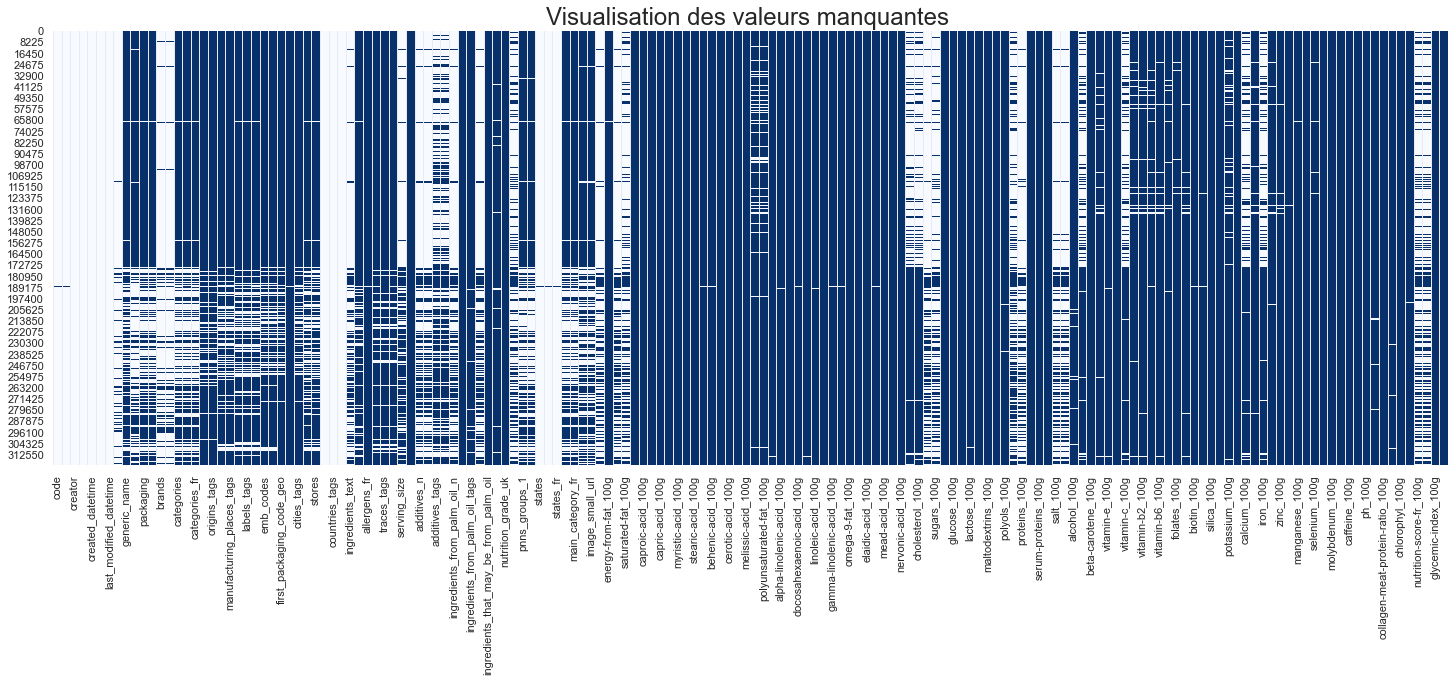

In [19]:
viz_na(products)

In [20]:
# fonction pour séparer les mots
def most_common_word(labels, sep=","):
    words=[]
    for lab in labels:
        words+=str(lab).split(sep)
    count=Counter(words)
    for word in count.most_common(50):
        print(word)

In [21]:
most_common_word(products["countries"])

('US', 169937)
('France', 80266)
('en:FR', 17240)
('Suisse', 12719)
('Deutschland', 6437)
('España', 3796)
('United Kingdom', 3579)
('United States', 2368)
('en:CH', 2176)
('en:BE', 1590)
('en:GB', 1528)
('Australia', 1486)
('en:DE', 1292)
('Belgique', 1292)
('Россия', 1185)
(' Suisse', 962)
('en:ES', 961)
('en:US', 768)
('Switzerland', 677)
('Germany', 676)
('en:AU', 651)
('Portugal', 645)
('en:IT', 610)
('en:CA', 593)
(' en:france', 566)
('Belgium', 364)
('Canada', 355)
('Italia', 348)
('UK', 301)
('Nederland', 298)
('Spain', 296)
('nan', 280)
(' US', 266)
('Allemagne', 240)
('en:CZ', 218)
(' en:switzerland', 211)
('Italie', 201)
('en:AT', 197)
('Guadeloupe', 182)
('Österreich', 179)
('en:TH', 175)
('en:NL', 172)
('Denmark', 170)
('Schweiz', 169)
('Royaume-Uni', 166)
('Italy', 166)
(' en:belgium', 162)
('Magyarország', 162)
('Brasil', 159)
('Frankreich', 155)


### Les 2 pays les plus documentés sont U.S.A et France
### je vais utiliser les produits vendus en France métropolitaine

colonne countries: list of countries where the product is sold

In [22]:
# selection produits vendus en  France metropolitaine
products_fr=products.loc[products['countries'].isin(['France','fr','FR','Fr','france','FRANCE']),:]

In [23]:
cont(products_fr)

taille totale du jeu de donnees : 12526164

nombre de lignes : 77322                         nombre de colonnes : 162

nombre de valeurs manquantes : 9135901           % de valeurs manquantes : 72.93


In [24]:
### print shape of dataframe 
products_fr.shape

(77322, 162)

### 2.3 NaN and duplicated

In [25]:
## vérifier si présence de code manquant 
products_fr['code'].isnull().sum()

0

In [26]:
# Vérifie si présence de doublons sur le code
products_fr['code'].duplicated().sum()

0

La variable code n'a pas de valeur manquante ni de doublon. Elle peut être utilisée comme clé primaire ou comme index pour la suite.

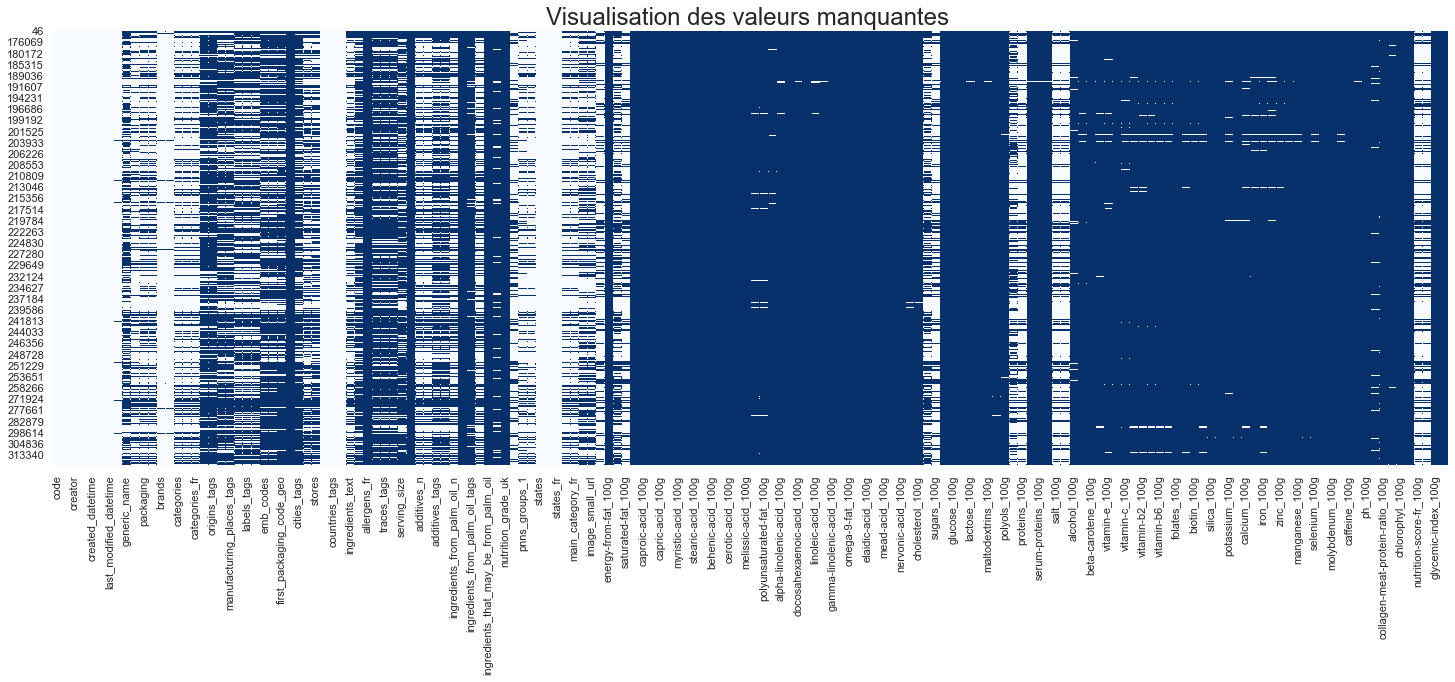

In [27]:
viz_na(products_fr)

In [28]:
missing_values(products_fr)

code                                            0.000000
countries                                       0.000000
countries_tags                                  0.000000
countries_fr                                    0.000000
states_fr                                       0.000000
states_tags                                     0.000000
states                                          0.000000
last_modified_t                                 0.000000
created_datetime                                0.000000
created_t                                       0.000000
creator                                         0.000000
url                                             0.000000
last_modified_datetime                          0.000000
product_name                                    1.718786
brands                                          2.260676
brands_tags                                     2.260676
pnns_groups_2                                  17.944440
pnns_groups_1                  

In [29]:
## valeurs manquantes en % 
_top_na=(products_fr.isna().mean()*100).sort_values( ascending=True).reset_index()
_top_na=_top_na.rename(columns = {'index': 'variable',0 : "%_na"})
_top_na.tail(13)

variable   %_na
149                myristic-acid_100g  100.0
150                palmitic-acid_100g  100.0
151                 stearic-acid_100g  100.0
152                 behenic-acid_100g  100.0
153              lignoceric-acid_100g  100.0
154                 cerotic-acid_100g  100.0
155               glycemic-index_100g  100.0
156  dihomo-gamma-linolenic-acid_100g  100.0
157                 elaidic-acid_100g  100.0
158                 gondoic-acid_100g  100.0
159                    mead-acid_100g  100.0
160                nervonic-acid_100g  100.0
161               water-hardness_100g  100.0

In [30]:
#### regrouper en classes pour une meilleure visualisation
top_na=_top_na.copy()
top_na["tranche"] = top_na["%_na"]
bin_labels=['[0-20]', ']20-40]', ']40-60]',']60-80]',']80-100]']
top_na["tranche"] =pd.cut(x=top_na["tranche"], bins=[-1,19,39,59,79,101],labels=bin_labels)
top_na.groupby('tranche').agg({'%_na':['count']})

%_na
         count
tranche       
[0-20]      17
]20-40]     23
]40-60]     11
]60-80]     13
]80-100]    98

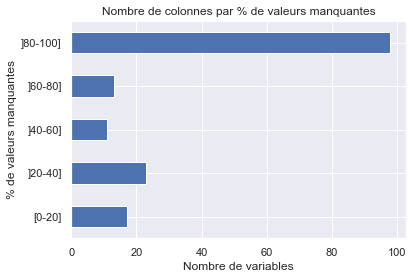

In [31]:
top_na.groupby('tranche').agg({'%_na':['count']}).plot(kind='barh',legend=False)
plt.ylabel('% de valeurs manquantes')
plt.xlabel('Nombre de variables')

plt.title('Nombre de colonnes par % de valeurs manquantes')
plt.show()

Il y a 111 variables qui ont plus de 60% de valeurs manquantes et donc 51 valeurs qui ont au maximum 60%  de valeurs manquantes!

In [32]:
#on conserve les variables avec un taux de remplissage et on les stocke dans list_na
list_na=_top_na.loc[_top_na['%_na']<=60,'variable']


In [33]:
list_na.shape

(51,)

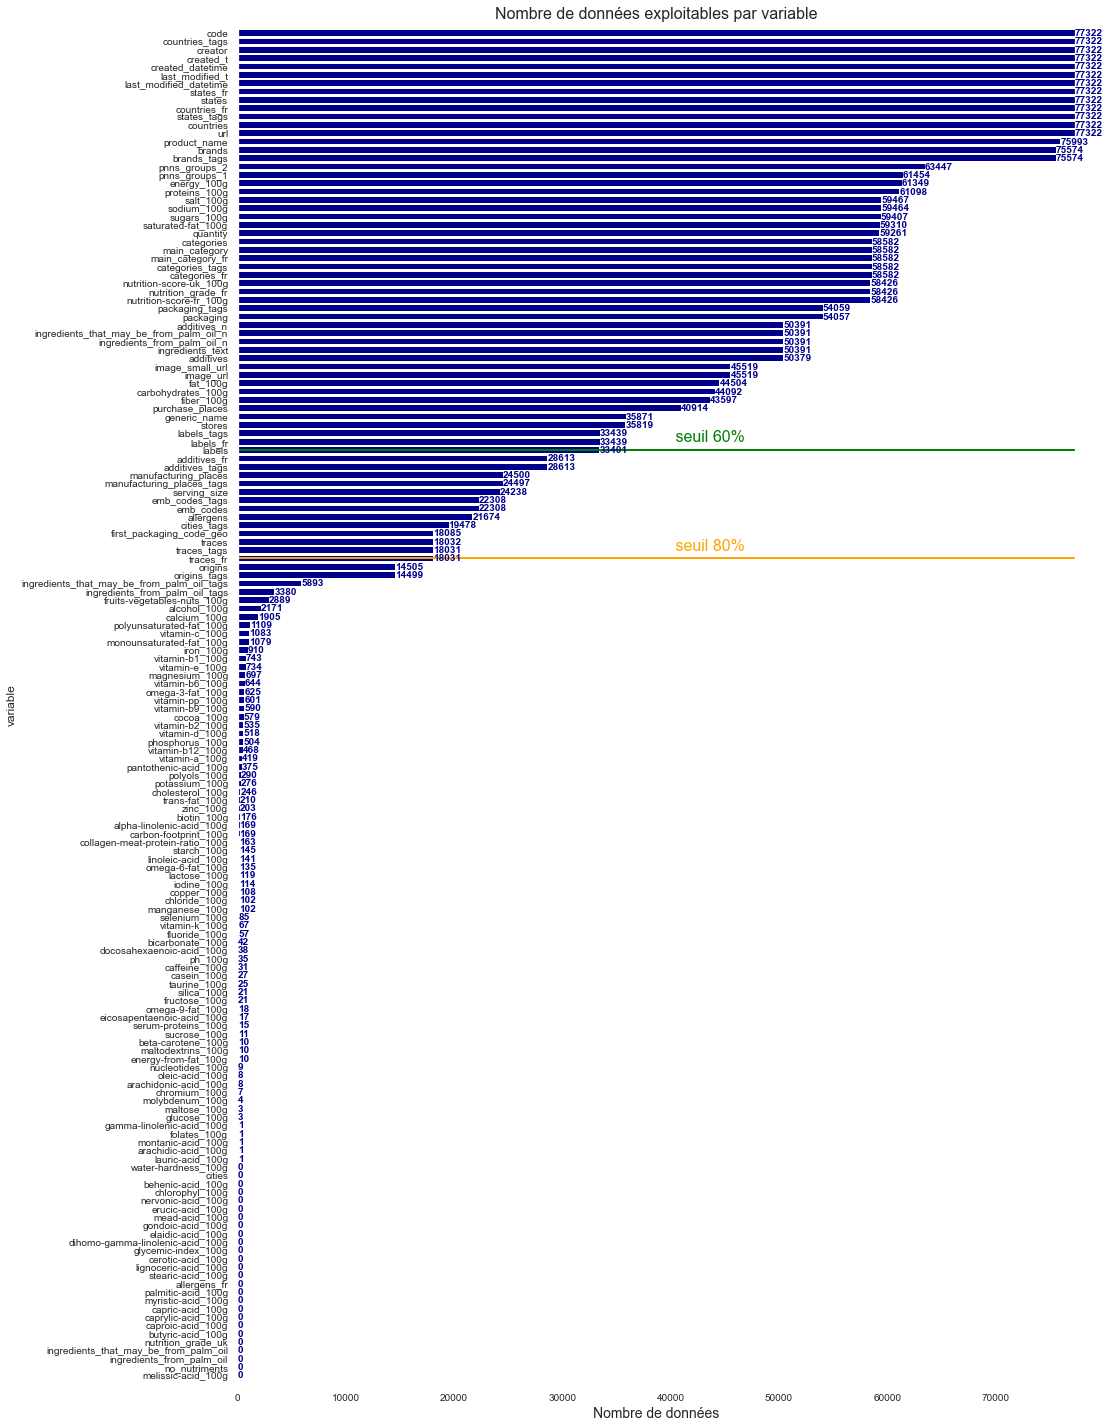

In [34]:
# nombre de données par variable
fig, ax = plt.subplots(figsize=(15, 25))
nb_valeurs = products_fr.count()
nb_valeurs.sort_values(inplace=True)
ax.barh(y=nb_valeurs.index, width=nb_valeurs.values, color='darkblue')

## afficher une droite qui représente le nombre de variables de la tranche ]80-100]

ax.plot([0,products_fr.shape[0]],\
        [top_na.loc[top_na['tranche']==']80-100]'].count(),top_na.loc[top_na['tranche']==']80-100]'].count()],color='orange')
ax.text(40000,99," seuil 80%",color='orange',fontsize=16)
## afficher une droite qui représente le nombre de variables de la tranche ]60-80]
ax.plot([0,products_fr.shape[0]],\
        [top_na.loc[top_na['tranche']==']60-80]'].count()+top_na.loc[top_na['tranche']==']80-100]'].count(),\
         top_na.loc[top_na['tranche']==']60-80]'].count()+top_na.loc[top_na['tranche']==']80-100]'].count()],color='green')
ax.text(40000,112," seuil 60%",color='green',fontsize=16)
### affichage de la valeur à côté du barplot
for i, v in enumerate(nb_valeurs):
    ax.text(v +5, i-0.30 , str(v), color='darkblue',
            fontsize=10, fontweight='bold')
ax.set_title('Nombre de données exploitables par variable', fontsize=16)
ax.set_xlabel('Nombre de données', fontsize=14)
ax.set_ylabel('variable', fontsize=12)
plt.tick_params(labelsize=10)

ax.set_xlim([0, products_fr.shape[0]])
ax.set_ylim([-1, products_fr.shape[1]])
ax.set_facecolor('w')
ax.grid(False)
plt.show()

Je conserve les données qui ont un taux de valeurs manquantes inférieur ou égal à 60 % (les valeurs au dessus de la droite verte)

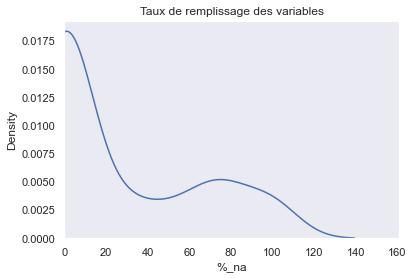

variables restantes : 51


In [35]:
# Représentation graphique du taux de remplissage des champs 
sns.kdeplot(100-top_na['%_na'])
plt.grid(False)
plt.xlim([0,161])
plt.title('Taux de remplissage des variables')
plt.show()
## affecter le nom des colonnes à enlever dans top_na_drop
top_na_drop=top_na[top_na['%_na']>60]
top_na_keep=top_na[top_na['%_na']<=60]
print(f'variables restantes : {top_na_keep.shape[0]}')
plt.show()


In [36]:
### colonnes non conservées
top_na_drop

variable        %_na   tranche
51                               additives_tags   62.995008   ]60-80]
52                                 additives_fr   62.995008   ]60-80]
53                         manufacturing_places   68.314322   ]60-80]
54                    manufacturing_places_tags   68.318202   ]60-80]
55                                 serving_size   68.653165   ]60-80]
56                               emb_codes_tags   71.149220   ]60-80]
57                                    emb_codes   71.149220   ]60-80]
58                                    allergens   71.969168   ]60-80]
59                                  cities_tags   74.809239   ]60-80]
60                     first_packaging_code_geo   76.610796   ]60-80]
61                                       traces   76.679341   ]60-80]
62                                  traces_tags   76.680634   ]60-80]
63                                    traces_fr   76.680634   ]60-80]
64                                      origins   81.240785  ]80-100]
65                                 origins_tags   81.248545  ]80-100]
66   ingredients_that_may_be_from_palm_oil_tags   92.378624  ]80-100]
67               ingredients_from_palm_oil_tags   95.628670  ]80-100]
68                  fruits-vegetables-nuts_100g   96.263677  ]80-100]
69                                 alcohol_100g   97.192261  ]80-100]
70                                 calcium_100g   97.536277  ]80-100]
71                     polyunsaturated-fat_100g   98.565738  ]80-100]
72                               vitamin-c_100g   98.599364  ]80-100]
73                     monounsaturated-fat_100g   98.604537  ]80-100]
74                                    iron_100g   98.823103  ]80-100]
75                              vitamin-b1_100g   99.039083  ]80-100]
76                               vitamin-e_100g   99.050723  ]80-100]
77                               magnesium_100g   99.098575  ]80-100]
78                              vitamin-b6_100g   99.167119  ]80-100]
79                             omega-3-fat_100g   99.191692  ]80-100]
80                              vitamin-pp_100g   99.222731  ]80-100]
81                              vitamin-b9_100g   99.236957  ]80-100]
82                                   cocoa_100g   99.251183  ]80-100]
83                              vitamin-b2_100g   99.308088  ]80-100]
84                               vitamin-d_100g   99.330074  ]80-100]
85                              phosphorus_100g   99.348180  ]80-100]
86                             vitamin-b12_100g   99.394739  ]80-100]
87                               vitamin-a_100g   99.458110  ]80-100]
88                        pantothenic-acid_100g   99.515015  ]80-100]
89                                 polyols_100g   99.624945  ]80-100]
90                               potassium_100g   99.643051  ]80-100]
91                             cholesterol_100g   99.681850  ]80-100]
92                               trans-fat_100g   99.728408  ]80-100]
93                                    zinc_100g   99.737462  ]80-100]
94                                  biotin_100g   99.772380  ]80-100]
95                    alpha-linolenic-acid_100g   99.781433  ]80-100]
96                        carbon-footprint_100g   99.781433  ]80-100]
97             collagen-meat-protein-ratio_100g   99.789193  ]80-100]
98                                  starch_100g   99.812473  ]80-100]
99                           linoleic-acid_100g   99.817646  ]80-100]
100                            omega-6-fat_100g   99.825405  ]80-100]
101                                lactose_100g   99.846098  ]80-100]
102                                 iodine_100g   99.852565  ]80-100]
103                                 copper_100g   99.860324  ]80-100]
104                               chloride_100g   99.868084  ]80-100]
105                              manganese_100g   99.868084  ]80-100]
106                               selenium_100g   99.890070  ]80-100]
107                              vitamin-k_100g  

In [37]:
## vérification en affichant les statistiques descriptives
top_na_drop.describe().T

count       mean       std        min        25%       50%        75%  \
%_na  111.0  95.929995  9.524518  62.995008  99.179406  99.89007  99.998707   

        max  
%_na  100.0

In [38]:
##on stocker les variables avec le taux de remplissage < 60 dans une liste
list_na_drop=top_na_drop["variable"].tolist()
### enlever les  colonnes avec taux de nan au dessus du seuil fixé
df_cleaned=products_fr.drop(columns=list_na_drop)

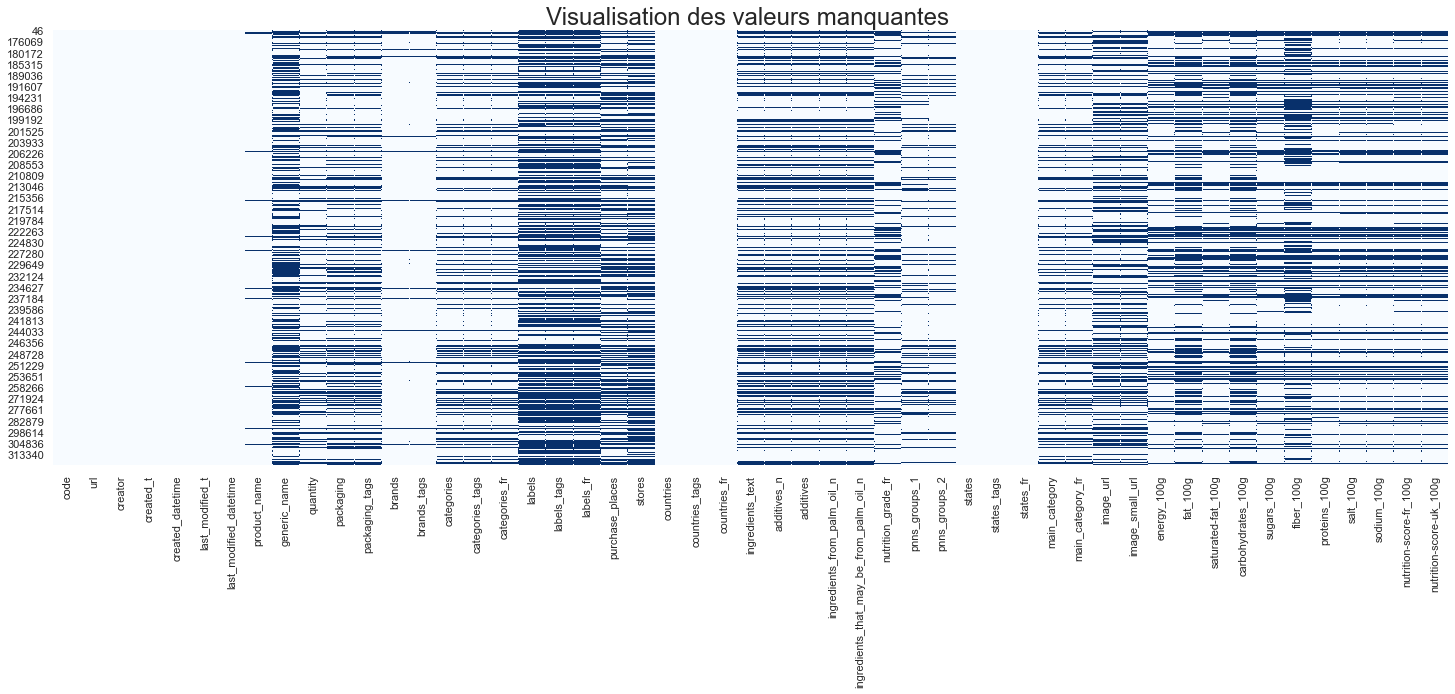

In [39]:
## représentation graphique des nan dans le dataframe partiellement nettoyé
viz_na(df_cleaned)

In [40]:
missing_values(df_cleaned)

code                                        0.000000
countries_fr                                0.000000
states_fr                                   0.000000
states_tags                                 0.000000
countries_tags                              0.000000
last_modified_datetime                      0.000000
states                                      0.000000
created_datetime                            0.000000
created_t                                   0.000000
creator                                     0.000000
url                                         0.000000
last_modified_t                             0.000000
countries                                   0.000000
product_name                                1.718786
brands                                      2.260676
brands_tags                                 2.260676
pnns_groups_2                              17.944440
pnns_groups_1                              20.521973
energy_100g                                20.

In [41]:
cont(df_cleaned)

taille totale du jeu de donnees : 3943422

nombre de lignes : 77322                         nombre de colonnes : 51

nombre de valeurs manquantes : 902477           % de valeurs manquantes : 22.89


In [43]:
### afficher les doublons sur toutes les colonnes

for col in df_cleaned.columns:
    n=df_cleaned.duplicated(subset=col).sum()
    print(f"col : {col}  -> duplicated : {n}")
    

col : code  -> duplicated : 0
col : url  -> duplicated : 0
col : creator  -> duplicated : 75161
col : created_t  -> duplicated : 213
col : created_datetime  -> duplicated : 213
col : last_modified_t  -> duplicated : 1705
col : last_modified_datetime  -> duplicated : 1705
col : product_name  -> duplicated : 15016
col : generic_name  -> duplicated : 51623
col : quantity  -> duplicated : 69133
col : packaging  -> duplicated : 67428
col : packaging_tags  -> duplicated : 69224
col : brands  -> duplicated : 59910
col : brands_tags  -> duplicated : 63417
col : categories  -> duplicated : 52107
col : categories_tags  -> duplicated : 62501
col : categories_fr  -> duplicated : 62501
col : labels  -> duplicated : 64917
col : labels_tags  -> duplicated : 68166
col : labels_fr  -> duplicated : 68166
col : purchase_places  -> duplicated : 73899
col : stores  -> duplicated : 75533
col : countries  -> duplicated : 77319
col : countries_tags  -> duplicated : 77320
col : countries_fr  -> duplicated : 77

## 2.4 Data inspection

In [44]:
df_cleaned.describe(include=np.number).T

count         mean           std  \
additives_n                              50391.0     1.858209      2.569332   
ingredients_from_palm_oil_n              50391.0     0.068048      0.255663   
ingredients_that_may_be_from_palm_oil_n  50391.0     0.148499      0.452327   
energy_100g                              61349.0  1167.891904  13169.609899   
fat_100g                                 44504.0    13.275804     16.990024   
saturated-fat_100g                       59310.0     5.385894      8.540477   
carbohydrates_100g                       44092.0    27.287732     27.304029   
sugars_100g                              59407.0    13.232197     19.029047   
fiber_100g                               43597.0     2.521876      4.635353   
proteins_100g                            61098.0     7.792157      7.922503   
salt_100g                                59467.0     1.160211      4.283065   
sodium_100g                              59464.0     0.456797      1.686226   
nutrition-score-fr_100g                  58426.0     8.599545      9.018205   
nutrition-score-uk_100g                  58426.0     8.290076      9.353161   

                                          min         25%          50%  \
additives_n                               0.0    0.000000     1.000000   
ingredients_from_palm_oil_n               0.0    0.000000     0.000000   
ingredients_that_may_be_from_palm_oil_n   0.0    0.000000     0.000000   
energy_100g                               0.0  427.000000  1026.000000   
fat_100g                                  0.0    1.300000     6.800000   
saturated-fat_100g                        0.0    0.300000     1.900000   
carbohydrates_100g                        0.0    3.900000    14.000000   
sugars_100g                              -0.1    1.000000     4.000000   
fiber_100g                                0.0    0.000000     1.300000   
proteins_100g                             0.0    1.800000     6.000000   
salt_100g                                 0.0    0.080000     0.570000   
sodium_100g                               0.0    0.031496     0.224409   
nutrition-score-fr_100g                 -15.0    1.000000     8.000000   
nutrition-score-uk_100g                 -15.0    0.000000     7.000000   

                                                 75%        max  
additives_n                                 3.000000       31.0  
ingredients_from_palm_oil_n                 0.000000        2.0  
ingredients_that_may_be_from_palm_oil_n     0.000000        5.0  
energy_100g                              1639.000000  3251373.0  
fat_100g                                   21.000000      380.0  
saturated-fat_100g                          7.300000      210.0  
carbohydrates_100g                         52.600000      190.0  
sugars_100g                                17.000000      105.0  
fiber_100g                                  3.200000      178.0  
proteins_100g                              11.000000      100.0  
salt_100g                                   1.250000      211.0  
sodium_100g                                 0.492126       83.0  
nutrition-score-fr_100g                    15.000000       40.0  
nutrition-score-uk_100g                    16.000000       36.0

##### Remarques A voir
        valeurs > 100 pour les champs se terminant par _100g pris en compte pour le calcul du nutriscore .
        valeur négative sur sugar_100g

In [45]:
df_cleaned=df_cleaned.reset_index(drop=True)
df_cleaned.describe(include=object)


code  \
count           77322   
unique          77322   
top     3478820023191   
freq                1   

                                                                                                  url  \
count                                                                                           77322   
unique                                                                                          77322   
top     http://world-fr.openfoodfacts.org/produit/26019178/puree-de-pommes-de-terre-en-flocons-albona   
freq                                                                                                1   

                           creator   created_t      created_datetime  \
count                        77322       77322                 77322   
unique                        2161       77109                 77109   
top     openfoodfacts-contributors  1473946144  2016-09-15T13:29:04Z   
freq                         19112           5                     5   

       last_modified_t last_modified_datetime                product_name  \
count            77322                  77322                       75993   
unique           75617                  75617                       62305   
top         1460887525   2016-04-17T10:05:25Z  Huile d'olive vierge extra   
freq                12                     12                          53   

                                               generic_name quantity  \
count                                                 35871    59261   
unique                                                25698     8188   
top     Pâtes alimentaires au blé dur de qualité supérieure    500 g   
freq                                                    195     2843   

               packaging    packaging_tags     brands brands_tags  \
count              54057             54059      75574       75574   
unique              9893              8097      17411       13904   
top     Sachet,Plastique  sachet,plastique  Carrefour   carrefour   
freq                2022              3701       2661        2720   

                                        categories  \
count                                        58582   
unique                                       25214   
top     Snacks sucrés,Biscuits et gâteaux,Biscuits   
freq                                           267   

                                           categories_tags  \
count                                                58582   
unique                                               14820   
top     en:sugary-snacks,en:biscuits-and-cakes,en:biscuits   
freq                                                   534   

                                     categories_fr  \
count                                        58582   
unique                                       14820   
top     Snacks sucrés,Biscuits et gâteaux,Biscuits   
freq                                           534   

                                                   labels  \
count                                               33401   
unique                                              12404   
top     Organic, EU Organic, fr:AB Agriculture Biologique   
freq                                                 3210   

                                                  labels_tags  \
count                                                   33439   
unique                                                   9155   
top     en:organic,en:eu-organic,fr:ab-agriculture-biologique   
freq                                                     5253   

                                         labels_fr purchase_places     stores  \
count                                        33439           40914      35819   
unique                                        9155            3422       1788   
top     Bio,Bio européen,AB Agriculture Biologique          France  Carrefour   
freq                                          5253           11288       5332   

       countries cou

In [46]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77322 entries, 0 to 77321
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     77322 non-null  object 
 1   url                                      77322 non-null  object 
 2   creator                                  77322 non-null  object 
 3   created_t                                77322 non-null  object 
 4   created_datetime                         77322 non-null  object 
 5   last_modified_t                          77322 non-null  object 
 6   last_modified_datetime                   77322 non-null  object 
 7   product_name                             75993 non-null  object 
 8   generic_name                             35871 non-null  object 
 9   quantity                                 59261 non-null  object 
 10  packaging                                54057

## 3.Cleaning

### 3.1 columns countries,countries_tags and countries_fr

In [47]:
df_cleaned['countries'].unique()

array(['France', 'FR', 'france'], dtype=object)

In [48]:
df_cleaned['countries_fr'].unique()

array(['France'], dtype=object)

In [49]:
df_cleaned['countries_tags'].unique()


array(['en:france', 'france'], dtype=object)

### le tri a été fait sur les produits vendus en FRANCE donc inutile de garder les colonnes countries...

In [50]:
#supprime les colonnes countries, countries_tag et countries_fr
df_cleaned=df_cleaned.drop(['countries','countries_tags','countries_fr'],axis=1)  

### 3.2 Usable/unusable columns  for our project 

#####  3.2.1 creator  :   contributor who first added the product  --> je ne conserve pas cette colonne

##### 3.2.2   created_t : date that the product was added (UNIX timestamp format) 
##### created_datetime : date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ)
##### last_modified_t : date that the product page was last modified
##### last_modified_datetime : date that the product page was last modified
#####  ce sont  des dates, mais elles sont actuellement codées comme étant des chaînes de caractère de type objet.
##### je vais conserver  created_datetime et je vais le convertir en date. 

In [51]:
df_cleaned=df_cleaned.drop(['creator','created_t','last_modified_t','last_modified_datetime'],axis=1)  

In [52]:
df_cleaned['created_datetime']=df_cleaned['created_datetime'].apply(lambda x: datetime.strptime(x[:10], "%Y-%m-%d"))# extraire la date en datetime64
timefmt = "%Y-%m-%d" 
df_cleaned['created_datetime'] = pd.to_datetime(df_cleaned['created_datetime'], format = timefmt, errors='coerce')

In [53]:
df_cleaned['created_datetime'].sample(5)

22955   2017-03-04
26372   2016-02-20
45589   2015-12-16
22272   2015-07-02
75360   2012-10-17
Name: created_datetime, dtype: datetime64[ns]

##### 3.2.3 product_name et generic_name

In [54]:
df_cleaned[['product_name','generic_name']].sample(10)

product_name  \
63601                                         Blé  souffle et sucré   
45628                                  Choucroute d'Alsace cuisinée   
27889                                       Crevettes de Madagascar   
64182                                                Max Cool Lemon   
4936                                              tomme de Montagne   
37906                                           Flocons de sarrasin   
73068                                                   Coucous fin   
35998                                    Brioche tressée pur beurre   
76336                                                  Orange Juice   
61563  Confiture artisanale myrtille sauvage au sucre de canne roux   

                                                         generic_name  
63601                                                             NaN  
45628  Choucroute d'Alsace cuisinée à la graisse d'oie et au Riesling  
27889                                                             NaN  
64182                                                             NaN  
4936                                                              NaN  
37906                                                             NaN  
73068                                                             NaN  
35998                                                             NaN  
76336    Boisson rafraîchissante orange avec supplément de vitamine C  
61563                                                             NaN

In [55]:
df_cleaned[['product_name','generic_name']].isnull().sum()

product_name     1329
generic_name    41451
dtype: int64

##### je ne conserve pas generic_name --> trop de valeurs manquantes

In [56]:
df_cleaned=df_cleaned.drop(['generic_name'],axis=1)  

##### 3.2.4 quantity 

In [57]:
# ne conserve pas-->  unités différentes et valeurs manquantes
df_cleaned['quantity'].unique()

array(['2.46 kg', nan, '1 kg ', ..., '210 ml', '250 g (10 pièces)',
       '18,66kg'], dtype=object)

In [58]:
df_cleaned=df_cleaned.drop(['quantity'],axis=1)  

##### 3.2.5 categories_tags, categories_fr, categories

In [59]:

df_cleaned[['product_name','categories_tags','categories_fr','categories']].sample(3)

product_name  \
1438         Cookie snack   
23346  Gressins Au Sesame   
22038     Pom'salardaises   

                                                     categories_tags  \
1438   en:sugary-snacks,en:biscuits-and-cakes,en:biscuits,en:cookies   
23346                                                            NaN   
22038                                                            NaN   

                                            categories_fr categories  
1438   Snacks sucrés,Biscuits et gâteaux,Biscuits,Cookies    cookies  
23346                                                 NaN        NaN  
22038                                                 NaN        NaN

In [60]:
df_cleaned[['product_name','categories_tags','categories_fr','categories']].isnull().sum()

product_name        1329
categories_tags    18740
categories_fr      18740
categories         18740
dtype: int64

##### je ne garde pas categories_tags , categories_fr. Je conserve categories -->  plus concis

In [61]:
df_cleaned=df_cleaned.drop(['categories_tags','categories_fr'],axis=1)  

In [62]:
df_cleaned['categories'].unique().tolist()

['Filet de bœuf',
 nan,
 "Aliments et boissons à base de végétaux,Aliments d'origine végétale,Légumineuses et dérivés,Céréales et pommes de terre,Légumineuses,Graines,Graines de légumineuses,Légumes secs,Lentilles vertes",
 'Root bier',
 'Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés',
 'Bonbons',
 "Aliments et boissons à base de végétaux,Boissons,Aliments d'origine végétale,Boissons chaudes,Infusions,Thés,Thés noirs,Boissons non sucrées,Thés noirs aromatisés,Thés aromatisés",
 'Sirops,Sirops pour ganache',
 'Sodas au cola',
 'Sodas au citron,Boissons sucrées',
 'Snacks sucrés,Desserts,Biscuits et gâteaux,Gâteaux,Madeleines',
 'Cakes aux raisins,Cakes,Gâteaux',
 'Snacks sucrés,Desserts,Biscuits et gâteaux,Gâteaux,Pâtisseries,Cakes aux fruits',
 'Viandes de porc',
 'Snacks sucrés,Biscuits et gâteaux,Desserts,Gâteaux,Pâtisseries,Financiers',
 'Snacks sucrés,Biscuits et gâteaux,Desserts,Gâteaux,Pâtisseries,Gâteaux au citron',
 'Soda',
 'Crème de marrons',
 'Gâteaux,Goûters individuels

In [63]:
## localiser les 'non alimentaire'
df_cleaned.loc[df_cleaned['categories']=='Non alimentaire'][['code','product_name']]

code  \
318    0052742211909   
1383   0883929140886   
9942   3059942280992   
10148  3067335350269   
17807  3222475632457   
42740  3400938709544   
42741  3400938709834   
47054  3518646126628   
63009  4000158743077   
64508  4304493672918   

                                                        product_name  
318                                                              NaN  
1383   Harry Potter & The Deathly Hallows Radcliffe / Grint / Watson  
9942                                                             NaN  
10148                                                        Agrafes  
17807                                                            NaN  
42740                                                            NaN  
42741                                                            NaN  
47054                                                       Vaseline  
63009                                                            NaN  
64508                                                      SUPPRIMER

In [64]:
# supprimer les 'non alimentaire'
df_cleaned = df_cleaned.loc[~((df_cleaned['categories']=='Non alimentaire'))]

In [65]:
### remplir les nan avec la valeur "non connue " 
df_cleaned['categories']=df_cleaned['categories'].fillna("non connue")

##### 3.2.6 labels_fr, labels_tags, labels_fr

In [66]:
df_cleaned[['labels_fr','labels_tags','labels']].sample(5)

labels_fr  \
27833                                         NaN   
37410         Sans conservateurs,Sans édulcorants   
14328  Bio,Bio européen,AB Agriculture Biologique   
48619  Bio,Bio européen,AB Agriculture Biologique   
24572       FSC,Sans colorants,Sans conservateurs   

                                                 labels_tags  \
27833                                                    NaN   
37410              en:no-preservatives,en:without-sweeteners   
14328  en:organic,en:eu-organic,fr:ab-agriculture-biologique   
48619  en:organic,en:eu-organic,fr:ab-agriculture-biologique   
24572             en:fsc,en:no-colorings,en:no-preservatives   

                                                  labels  
27833                                                NaN  
37410                Sans édulcorants,Sans conservateurs  
14328         Bio,Bio européen,AB Agriculture Biologique  
48619  Organic, EU Organic, fr:AB Agriculture Biologique  
24572              Sans colorants,FSC,Sans conservateurs

##### je ne garde pas ces champs ( peu intéressant pour notre sujet) 

In [67]:
df_cleaned=df_cleaned.drop(['labels_fr','labels_tags','labels'],axis=1)  

##### 3.2.7 packaging_tags, packaging, purchase_places, stores

In [68]:
df_cleaned[['packaging_tags','packaging','purchase_places','stores']].isnull().sum()

packaging_tags     23256
packaging          23258
purchase_places    36398
stores             41493
dtype: int64

In [69]:
df_cleaned[['packaging_tags','packaging','purchase_places','stores']].nunique()

packaging_tags     8097
packaging          9893
purchase_places    3422
stores             1788
dtype: int64

##### je ne garde pas ces champs car trop de nan  et peu d'intéret pour la suite

In [70]:
df_cleaned=df_cleaned.drop(['packaging_tags','packaging','purchase_places','stores'],axis=1)  

##### 3.2.8 brands, brands_tags 

In [71]:
# je garde la colonne brands 'plus lisible' 
df_cleaned[['brands','brands_tags']].sample(10)

brands          brands_tags
4734    Maître Jean Pierre   maitre-jean-pierre
7423    Sans marque,Christ   sans-marque,christ
7335               Materne              materne
37957               Markal               markal
35548                 Malo                 malo
24577                    U                    u
37942               Markal               markal
13889                Lay's                lay-s
15140                Hépar                hepar
66421  Nescafe Dolce Gusto  nescafe-dolce-gusto

##### je conserve la colonne brands ---> plus lisible

In [72]:
df_cleaned=df_cleaned.drop(['brands_tags'],axis=1)  

##### 3.2.9 states, states_tags, states_fr 

In [73]:
df_cleaned[['states','states_tags','states_fr']].sample(5)

states  \
46065  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded   
68978                           en:to-be-checked, en:complete, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-completed, en:categories-completed, en:brands-completed, en:packaging-completed, en:quantity-completed, en:product-name-completed, en:photos-validated, en:photos-uploaded   
27384                                                              en:to-be-checked, en:complete, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:characteristics-completed, en:categories-completed, en:brands-completed, en:packaging-completed, en:quantity-completed, en:product-name-completed, en:photos-validated, en:photos-uploaded   
16660                                                              en:to-be-checked, en:complete, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:characteristics-completed, en:categories-completed, en:brands-completed, en:packaging-completed, en:quantity-completed, en:product-name-completed, en:photos-validated, en:photos-uploaded   
32607  en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded   

                                                                                                                                                                                                                                                                                                                                                                    states_tags  \
46065  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded   
68978                            en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded   
27384                                                              en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded   
16660                                                              en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded   
32607  en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed

##### je ne conserve pas ces colonnes ( pas d'intéret)

In [74]:
df_cleaned=df_cleaned.drop(['states','states_tags','states_fr'],axis=1)  

##### 3.2.10 ingredients_text, additives_n, additives 

In [75]:
df_cleaned[['ingredients_text','additives_n','additives']].sample(5)

ingredients_text  \
53571                                                                                                                                                                                                                 Sucre,crème de lait,sirop de glucose,beurre,fleur de sel,E471   
16695                                                                                                                                                                                                                                                                           NaN   
10827  Semoule de blé dur réhydratée 62%, poivrons 11%, tomates 6%, huile de colza, oignons, concombre 3%, vinaigre d'alcool, menthe douce 1%, raisins 1% (Raisin, huile de colza), persil 1%, huile d'olive vierge extra, sucre, sel, arômes naturels, épices, plantes aromatiques   
66532                                                                                                                                                                                                                                                                           NaN   
65999                                                                                                                                                                                                                                                                           NaN   

       additives_n  \
53571          1.0   
16695          NaN   
10827          0.0   
66532          NaN   
65999          NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    additives  
53571                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

##### je conserve les colonnes 'ingredients_text'et 'additives_n'

In [76]:
df_cleaned=df_cleaned.drop(['additives'],axis=1)  

##### 3.2.11 pnns_groups_1, pnns_groups_2, main_category , main_category_fr

In [77]:
df_cleaned[['pnns_groups_1','pnns_groups_2','main_category',"main_category_fr"]] .sample(5) 


pnns_groups_1         pnns_groups_2     main_category  \
33051  Composite foods        One-dish meals          en:meals   
31147  Composite foods              Sandwich     en:sandwiches   
12553        Beverages   Sweetened beverages          en:sodas   
53286   Fish Meat Eggs      Fish and seafood  en:smoked-fishes   
6446    Fat and sauces  Dressings and sauces     en:condiments   

      main_category_fr  
33051   Plats préparés  
31147        Sandwichs  
12553            Sodas  
53286   Poissons fumés  
6446        Condiments

In [78]:
df_cleaned[['pnns_groups_1','pnns_groups_2','main_category',"main_category_fr"]] .isnull().sum()


pnns_groups_1       15868
pnns_groups_2       13875
main_category       18740
main_category_fr    18740
dtype: int64

##### je supprime uniquement la colonne 'main_category_fr'

In [79]:
df_cleaned=df_cleaned.drop(['main_category'],axis=1)  

##### 3.2.12 ingredients_text

In [80]:
df_cleaned['ingredients_text'].sample(5)

25704                                                                                                                                                                                                                                                                                                   _Lait_ de vache pasteurisé, sel, ferments (dont _lait_), présure, colorant : rocou.
17686                                                                                                                                                                                                                                                                                                                                                                                   NaN
53405                                                                                                                                                                                                                                           

##### je conserve ce champs

##### 3.2.13 ingredients_from_palm_oil_n , ingredients_that_may_be_from_palm_oil_n

In [81]:
df_cleaned[['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']].sample(5)

ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n
36113                          NaN                                      NaN
54498                          0.0                                      0.0
30809                          0.0                                      0.0
37875                          0.0                                      0.0
66290                          0.0                                      0.0

##### je conserve ces colonnes à ce stade de l'étude

##### 3.2.14 url, image_url, image_small_url

In [82]:
df_cleaned[['url','image_url','image_small_url']].sample(5)

url  \
6393                                                                                  http://world-fr.openfoodfacts.org/produit/3000121146073/moules-de-bouchot-monbrun   
9577   http://world-fr.openfoodfacts.org/produit/3046920007382/chocolat-noir-extra-fin-traditionnel-fourre-interieur-saveur-pistache-et-eclats-d-amandes-lindt-creation   
74757                                                                                            http://world-fr.openfoodfacts.org/produit/8480017044532/edulcorant-dia   
65523                                                                           http://world-fr.openfoodfacts.org/produit/5026418079785/awesome-gummies-bon-bon-buddies   
28110                                 http://world-fr.openfoodfacts.org/produit/3258561140964/vinaigrette-moutarde-a-l-ancienne-allegee-en-matiere-grasses-belle-france   

                                                                          image_url  \
6393                                                                            NaN   
9577                                                                            NaN   
74757  http://fr.openfoodfacts.org/images/products/848/001/704/4532/front.3.400.jpg   
65523  http://fr.openfoodfacts.org/images/products/502/641/807/9785/front.7.400.jpg   
28110  http://fr.openfoodfacts.org/images/products/325/856/114/0964/front.6.400.jpg   

                                                                    image_small_url  
6393                                                                            NaN  
9577                                                                            NaN  
74757  http://fr.openfoodfacts.org/images/products/848/001/704/4532/front.3.200.jpg  
65523  http://fr.openfoodfacts.org/images/products/502/641/807/9785/front.7.200.jpg  
28110  http://fr.openfoodfacts.org/images/products/325/856/114/0964/front.6.200.jpg

In [83]:
df_cleaned[['url','image_url','image_small_url']].nunique()

url                77312
image_url          45517
image_small_url    45517
dtype: int64

##### je conserve url  à ce stade de l'étude

In [84]:
df_cleaned=df_cleaned.drop(['image_url','image_small_url'],axis=1)  

##### 3.2.15 nutrition_grade_fr

In [85]:
df_cleaned[['nutrition_grade_fr','nutrition-score-fr_100g']].sample(5)

nutrition_grade_fr  nutrition-score-fr_100g
16424                NaN                      NaN
3480                 NaN                      NaN
38359                  c                     10.0
66025                NaN                      NaN
25439                NaN                      NaN

##### je conserve ce champs

##### 3.2.16 nutrition-score-uk_100g   --> supprimer et conserver nutrition-score-fr_100g

In [86]:
# supprimer nutriscore_uk
df_cleaned=df_cleaned.drop(['nutrition-score-uk_100g'],axis=1)  

### nous conservons à ce stade 24 colonnes 

In [87]:
df_cleaned.columns.tolist()

['code',
 'url',
 'created_datetime',
 'product_name',
 'brands',
 'categories',
 'ingredients_text',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'main_category_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

## 4 Missing values  and outliers


In [88]:
# on va renommer nutrition-score-fr_100g en nutrition_score et saturated-fat_100g en saturated_fat_100g
df_cleaned=df_cleaned.rename(columns={"nutrition-score-fr_100g": "nutrition_score","saturated-fat_100g" : "saturated_fat_100g"})

In [89]:
df=df_cleaned.copy()

In [90]:
df.isnull().sum()

code                                           0
url                                            0
created_datetime                               0
product_name                                1323
brands                                      1741
categories                                     0
ingredients_text                           26921
additives_n                                26921
ingredients_from_palm_oil_n                26921
ingredients_that_may_be_from_palm_oil_n    26921
nutrition_grade_fr                         18887
pnns_groups_1                              15868
pnns_groups_2                              13875
main_category_fr                           18740
energy_100g                                15964
fat_100g                                   32808
saturated_fat_100g                         18003
carbohydrates_100g                         33220
sugars_100g                                17906
fiber_100g                                 33716
proteins_100g       

####  4.1 product_name

##### On constate qu'il y a 1323 produits qui n'ont pas de nom dans le dataframe --> Ce champs ne peut contenir des valeurs NAN. Il faut supprimer ces lignes           

In [91]:
df[['categories','product_name']].sample(5)

categories  \
71291  Snacks sucrés,Confiseries,Chewing-gum,Chewing-gum sans sucres   
67303                                                     non connue   
69642                                                     non connue   
41383                                                     non connue   
74732                                                 Jambons blancs   

                                            product_name  
71291       2Fresh parfums menthe fraîche / menthe forte  
67303                                 ERREUR_CODE_BARRES  
69642               Sauce Soja 150 ML Champignon épaisse  
41383                                 Saucisson Sec Noix  
74732  Jambon Cuit Supérieur avec couenne Dia 4 tranches

In [92]:
df.dropna(subset=['product_name'], inplace=True)

In [93]:
# vérification
df['product_name'].isnull().sum()

0

#### 4.2 brands

In [94]:
df['brands'].isnull().sum()

1020

il y a plusieurs produits dont la marque n'est pas connue Nous affectons la valeur Inconnue

In [95]:
df['brands'] = df['brands'].fillna(
    "inconnue")

In [96]:
df['brands'].unique().tolist()

['inconnue',
 'Bertrand Lejeune',
 'St Michel',
 'Alice Délice',
 'Pepsi',
 'Bo Frost',
 '7Up,Pepsico',
 'Bijou',
 'Sovivo',
 'Intermarché',
 'Le Moulin de Moreau-Sarlat',
 'Le Moulin de Moreau Sarlat',
 'Swedish By Nature',
 'Marks & Spencer',
 'Mark And Spencer',
 'Fleury Michon',
 'Liebig',
 'Mark & Spencer',
 'M&S',
 'De Nigris',
 'M&M',
 'Marché Franprix',
 'Imperial Dragon',
 'Hapi trading',
 'McIlhenny Company',
 'Tabasco',
 'herta',
 'Florette',
 'Lindt',
 'SINA',
 'Amofood',
 'Pure via',
 'Pepperidge farm',
 'Pepperidge Farm',
 'Chocolate Chunk,Pepperidge Farm',
 'Soft Baked,Pepperidge Farm',
 'Wonderful',
 'Wonderfull',
 'Wonderful pistachios',
 'Bioitalia',
 'Damiano',
 'Conagra Foods Inc.',
 "Sainsbury's",
 'Marks&Spencer',
 'Fromagerie Bonal',
 'Le Gaulois',
 'Betty Crocker',
 'Nature valley',
 'Aroy-D',
 'Aroy d',
 'Foco',
 'Aroy-D,Tang Frères SA,Thai Agri Foods Public Company Limited',
 'Thai agri foods',
 'AROY-D',
 'focp',
 'Pâturages',
 'Earl of Sandwich',
 'Barefoot'

##### Il y a beaucoup de lignes différentes qui font référence à une même enseigne/ marque (lié à la ponctuation, majuscule/minuscule) A voir si analyse plus en détail 

In [97]:
df['brands'][df['brands'].str.contains('eclerc')].unique()

array(['Leclerc', 'E.Leclerc', 'E. Leclerc',
       'Sans marque,E.Leclerc,Les 3 Meuniers', 'Eleclerc', 'E Leclerc',
       'Leclerc,Fromagerie Renard Gillard', 'BRIDOR,Leclerc',
       'marque repère Leclerc,Ronde des mers',
       'Brin de jour,Marque Repère,Leclerc',
       'Couleurs Vives Marque Repere Leclerc',
       'Nos Régions ont du Talent,Scamark (Filiale E. Leclerc)',
       'E.leclerc', 'Bio Leclerc',
       'Sélectionné par nos boûchers,Kermené,Leclerc', 'leclerc',
       'Eco +,Scamark (Filiale E. Leclerc)', 'Eco +,Leclerc',
       'Eco+,Leclerc', 'Eco +,E.Leclerc', 'Reflets de France,Leclerc',
       'Côté Table,Marque Repère,Scamark (Filiale E. Leclerc)',
       'Pêche Océan,Marque Repère,Scamark (Filiale E. Leclerc)',
       'Rustica,Marque repère,leclerc',
       'Notre Jardin,Marque Repère,Scamark (Filiale E. Leclerc)',
       'Jafaden,Marque Repère,Leclerc',
       'Notre jardin,Marque repère,leclerc',
       'Notre Jardin,Marque Repère,Scamark,Leclerc',
       'Dé

In [98]:
df.groupby('brands')[
    ['product_name']].count().sort_values(by='product_name', ascending=False).head(20)

product_name
brands                     
Carrefour              2644
Auchan                 2129
U                      1882
Leader Price           1585
Casino                 1439
inconnue               1020
Cora                    961
Picard                  814
Monoprix                671
Dia                     517
Fleury Michon           476
Netto                   415
Franprix                404
Nestlé                  394
La Vie Claire           318
Sans marque             303
Delhaize                254
Belle France            246
Andros                  221
Lindt                   219

#### 4.3 ingredients_text

In [99]:
df['ingredients_text'].isnull().sum()

25650

 si la valeur est absente on remplace par "non disponible"

In [100]:
df['ingredients_text'] = df['ingredients_text'].fillna(
    "non disponible")

#### 4.4 pnns_groups_1 , pnns_groups_2 et main_category_fr

In [101]:
df[['pnns_groups_1','pnns_groups_2','main_category_fr','product_name']].sample(5)

pnns_groups_1 pnns_groups_2  \
29934                      NaN           NaN   
28949  Milk and dairy products        Cheese   
55360             Salty snacks    Appetizers   
56740     Cereals and potatoes       Cereals   
55901           Fish Meat Eggs          Eggs   

                              main_category_fr  \
29934                                      NaN   
28949                       Fromages de France   
55360                          Chips et frites   
56740  Aliments et boissons à base de végétaux   
55901                      Produits labellisés   

                                                    product_name  
29934                                Confiture première myrtille  
28949   Le Délice De Bourgogne (Brillat-Savarin affiné) (38% MG)  
55360                                        Chips saveur Wasabi  
56740                                             Douceur de blé  
55901  6 oeufs de poules élevées en plein air Moyens Label Rouge

In [102]:
df[['pnns_groups_1','pnns_groups_2','main_category_fr']].isna().sum()

pnns_groups_1       15745
pnns_groups_2       13827
main_category_fr    17838
dtype: int64

In [103]:
df.loc[df['pnns_groups_1'].isna()& df['main_category_fr'].isna()][['pnns_groups_1','pnns_groups_2','main_category_fr','product_name']]

pnns_groups_1 pnns_groups_2 main_category_fr  \
8               NaN           NaN              NaN   
9               NaN           NaN              NaN   
11              NaN           NaN              NaN   
19              NaN           NaN              NaN   
35              NaN           NaN              NaN   
38              NaN           NaN              NaN   
39              NaN           NaN              NaN   
44              NaN           NaN              NaN   
49              NaN           NaN              NaN   
52              NaN           NaN              NaN   
54              NaN           NaN              NaN   
63              NaN           NaN              NaN   
65              NaN           NaN              NaN   
66              NaN           NaN              NaN   
67              NaN           NaN              NaN   
75              NaN           NaN              NaN   
77              NaN           NaN              NaN   
79              NaN           NaN              NaN   
93              NaN           NaN              NaN   
94              NaN           NaN              NaN   
95              NaN           NaN              NaN   
101             NaN           NaN              NaN   
110             NaN           NaN              NaN   
112             NaN           NaN              NaN   
119             NaN           NaN              NaN   
121             NaN           NaN              NaN   
122             NaN           NaN              NaN   
131             NaN           NaN              NaN   
137             NaN           NaN              NaN   
157             NaN           NaN              NaN   
160             NaN           NaN              NaN   
163             NaN           NaN              NaN   
165             NaN           NaN              NaN   
166             NaN           NaN              NaN   
167             NaN           NaN              NaN   
168             NaN           NaN              NaN   
169             NaN           NaN              NaN   
170             NaN           NaN              NaN   
172             NaN           NaN              NaN   
175             NaN           NaN              NaN   
176             NaN           NaN              NaN   
178             NaN           NaN              NaN   
179             NaN           NaN              NaN   
186             NaN           NaN              NaN   
190             NaN           NaN              NaN   
192             NaN           NaN              NaN   
193             NaN           NaN              NaN   
195             NaN           NaN              NaN   
197             NaN           NaN              NaN   
198             NaN           NaN              NaN   
204             NaN           NaN              NaN   
208             NaN           NaN              NaN   
209             NaN           NaN              NaN   
210             NaN           NaN              NaN   
212             NaN           NaN              NaN   
215             NaN           NaN              NaN   
217             NaN           NaN              NaN   
219             NaN           NaN              NaN   
223             NaN           NaN              NaN   
224             NaN           NaN              NaN   
225             NaN           NaN              NaN   
226             NaN           NaN              NaN   
227             NaN           NaN              NaN   
230             NaN           NaN              NaN   
235             NaN           NaN              NaN   
236             NaN           NaN              NaN   
238             NaN           NaN              NaN   
240             NaN           NaN              NaN   
242             NaN           NaN              NaN   
244             NaN           NaN              NaN   
245             NaN           NaN              NaN   
246             NaN           NaN              NaN   
247             NaN           NaN              NaN   
250       

In [104]:
df['main_category_fr']=df['main_category_fr'].fillna('unknown')
df['pnns_groups_1']=df['pnns_groups_1'].fillna('unknown')
df['pnns_groups_2']=df['pnns_groups_2'].fillna('unknown')

####  4.5 les colonnes se terminant par _100g

In [105]:
# Récupération des labels contenant le mot clé '100g'
labels_100g = []
for col in df :
    if "_100g" in col :
        labels_100g.append(col) 


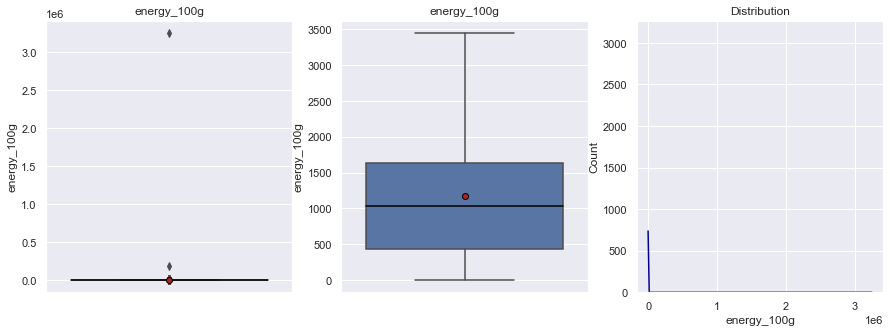

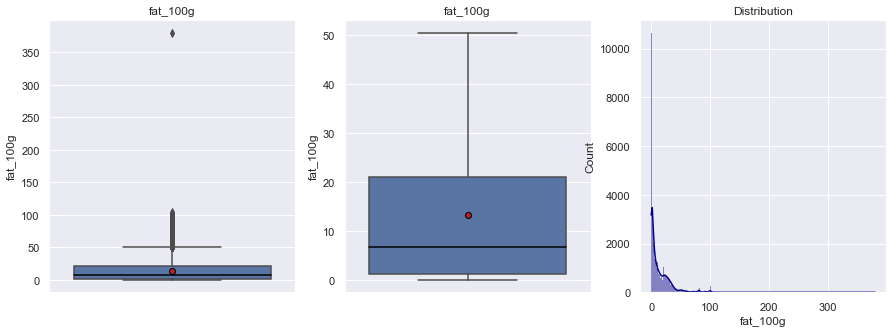

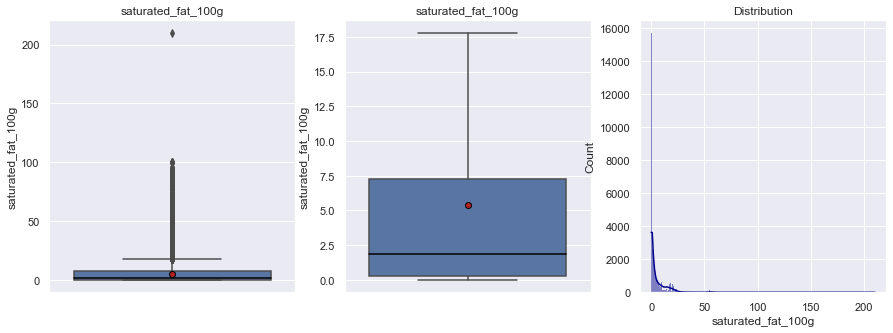

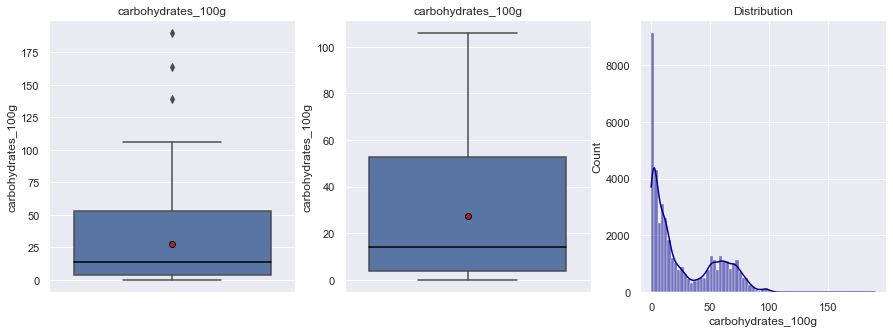

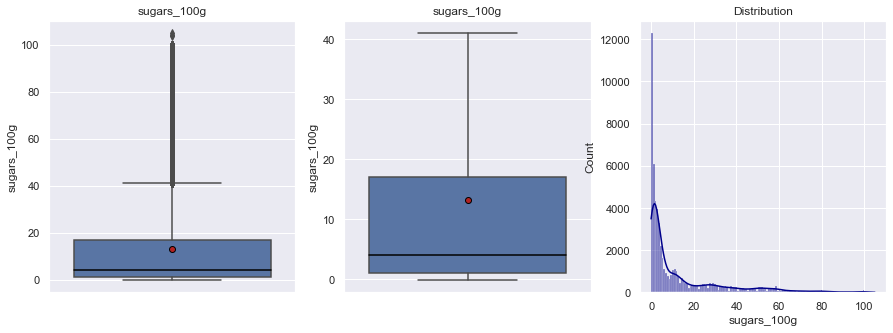

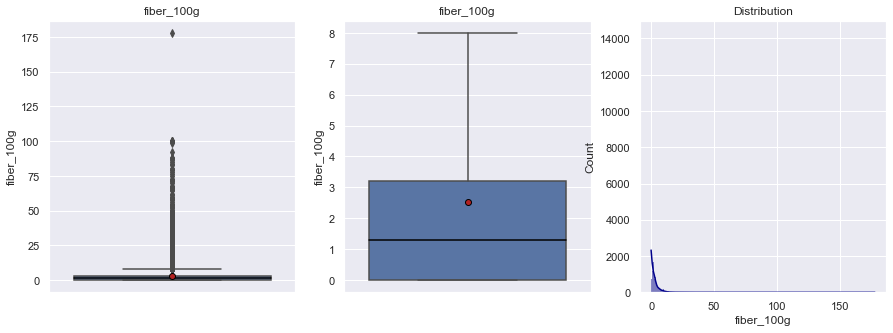

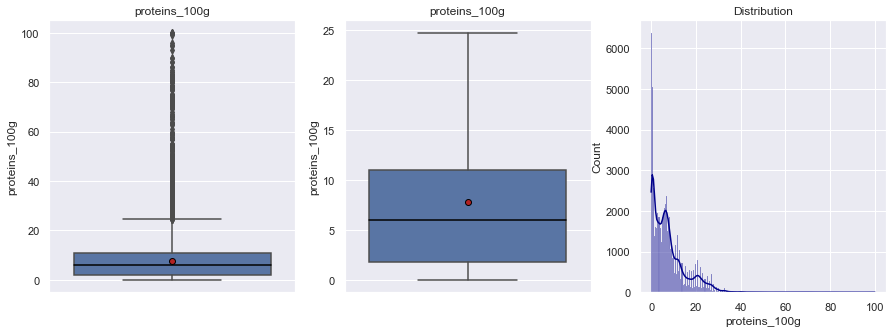

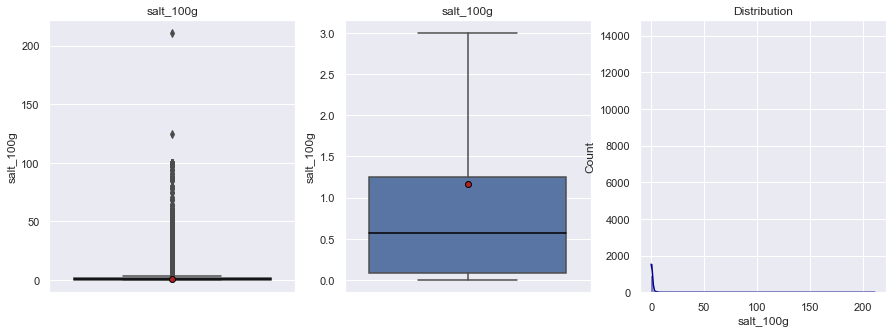

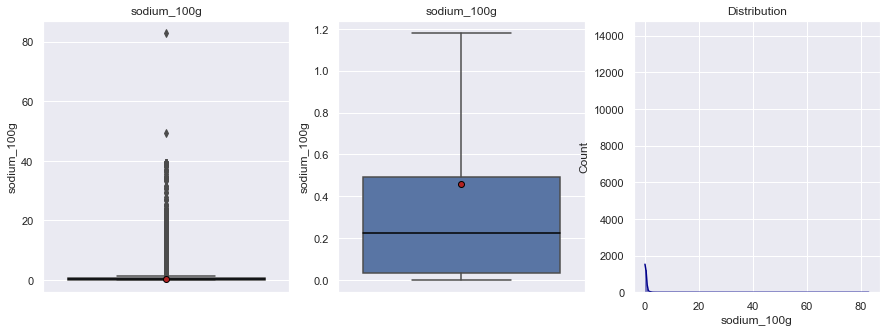

In [106]:
for m in labels_100g:
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    # Propriétés graphiques     
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    sns.boxplot( y=df[m], showfliers=True,medianprops=medianprops, showmeans=True, meanprops=meanprops)
    plt.title(m)
    plt.ylabel(m)
    plt.subplot(1,3,2)
    # Propriétés graphiques     
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    sns.boxplot( y=df[m], showfliers=False,medianprops=medianprops, showmeans=True, meanprops=meanprops)
    plt.title(m)
    plt.ylabel(m)

    plt.subplot(1,3,3)
    sns.histplot(df[m], kde = True, color='Darkblue')
    plt.title("Distribution")
    plt.xlabel(m)
    plt.show()

   #### On peut observer  la présence d 'outliers et de valeurs aberrantes sur les boxplots.
   
 Intéressons nous aux valeurs aberrantes qui sont physiquement impossibles.
   
 il y a des valeurs négatives pour le sucre --> mettre valeur à 0
 
 il y a des valeurs >100g pour 100g de nutriment--> borner la valeur maximale de ces variables à 100

In [107]:
df[labels_100g].describe().T

count         mean           std  min         25%  \
energy_100g         61032.0  1167.191232  13200.763667  0.0  427.000000   
fat_100g            44209.0    13.276640     16.999760  0.0    1.300000   
saturated_fat_100g  59008.0     5.387392      8.547761  0.0    0.300000   
carbohydrates_100g  43795.0    27.273960     27.307631  0.0    3.900000   
sugars_100g         59097.0    13.227449     19.025698 -0.1    1.000000   
fiber_100g          43408.0     2.519747      4.618394  0.0    0.000000   
proteins_100g       60782.0     7.799352      7.920332  0.0    1.800000   
salt_100g           59160.0     1.161341      4.291280  0.0    0.080000   
sodium_100g         59157.0     0.457242      1.689460  0.0    0.031496   

                            50%          75%        max  
energy_100g         1027.000000  1638.000000  3251373.0  
fat_100g               6.800000    21.000000      380.0  
saturated_fat_100g     1.900000     7.300000      210.0  
carbohydrates_100g    14.000000    52.600000      190.0  
sugars_100g            4.000000    17.000000      105.0  
fiber_100g             1.300000     3.200000      178.0  
proteins_100g          6.000000    11.000000      100.0  
salt_100g              0.570000     1.250000      211.0  
sodium_100g            0.224409     0.492126       83.0

In [108]:
# retirer energy_100g exprimer en kjoules
labels_100g.remove('energy_100g') #### retirer car les unités sont des kjoules       

In [109]:
# met la valeur à 0 si < 0  sinon on met la valeur à  100 si > 100 sinon valeur = valeur
for col in labels_100g:
    df[col] = [0 if val < 0 else 100 if val > 100 
                    else val for val in df[col]]

In [110]:
df[labels_100g].describe().T

count       mean        std  min       25%        50%  \
fat_100g            44209.0  13.270193  16.914480  0.0  1.300000   6.800000   
saturated_fat_100g  59008.0   5.385527   8.515069  0.0  0.300000   1.900000   
carbohydrates_100g  43795.0  27.269131  27.288990  0.0  3.900000  14.000000   
sugars_100g         59097.0  13.227239  19.024708  0.0  1.000000   4.000000   
fiber_100g          43408.0   2.517950   4.564982  0.0  0.000000   1.300000   
proteins_100g       60782.0   7.799352   7.920332  0.0  1.800000   6.000000   
salt_100g           59160.0   1.159042   4.212102  0.0  0.080000   0.570000   
sodium_100g         59157.0   0.457242   1.689460  0.0  0.031496   0.224409   

                          75%    max  
fat_100g            21.000000  100.0  
saturated_fat_100g   7.300000  100.0  
carbohydrates_100g  52.600000  100.0  
sugars_100g         17.000000  100.0  
fiber_100g           3.200000  100.0  
proteins_100g       11.000000  100.0  
salt_100g            1.250000  100.0  
sodium_100g          0.492126   83.0

 les valeurs de saturated-fat_100g ne peuvent pas être supérieurs à fat_100g.
 
 les valeurs de sodium_100g qui ne peuvent pas être supérieurs à salt_100g.


In [111]:
# on supprime  les valeurs
df = df.loc[~((df['saturated_fat_100g'] > df['fat_100g']) | (df['sodium_100g'] > df['salt_100g']))]

l'énergie maximale pour 100g est de 3700 kJ/100g  (source Wikipedia).

In [112]:
# on supprime  les valeurs >3700 kj
df = df[~(df['energy_100g'] > 3700)]
                               

la somme des variables_100g d'une ligne ne doivent pas être >100g ni égale à 0

In [113]:
labels_nutri_100g=labels_100g.copy()
labels_nutri_100g.remove('salt_100g')

In [114]:
# je crée une colonne tot_100g=somme des nutriments _100g 
df['tot_100g']=df[labels_nutri_100g].sum(axis=1)
# afficher 5 exemples
print(df.loc[df['tot_100g']>100][labels_nutri_100g+['tot_100g']].sample(5))
## supprimer les lignes avec tot_100g >100g
df = df[~(df['tot_100g'] > 100)]
# j enleve la colonne tot_100g
df.drop('tot_100g',axis=1,inplace=True)
# je réinitialise la liste labels_nutri_100g=[]
labels_nutri_100g=[]

       fat_100g  saturated_fat_100g  carbohydrates_100g  sugars_100g  \
24997      17.5                7.70                72.7         31.8   
60648      35.0               20.20                52.6         37.6   
69777       0.0                0.00                81.6         81.6   
42234      22.0                6.20                60.0         18.5   
30103      24.0                9.67                50.0         40.0   

       fiber_100g  proteins_100g  sodium_100g    tot_100g  
24997         1.8            6.1     0.354331  137.954331  
60648         NaN            6.4     0.055400  151.855400  
69777         0.0            0.0     0.264000  163.464000  
42234         4.1            6.8     0.137795  117.737795  
30103         3.0            6.0     0.144000  132.814000  


In [115]:
df.shape

(64625, 24)

On supprime les lignes dont tout les labels_100g sont à 0 ou nulles

In [116]:
df = df.loc[~((df[labels_100g]==0) | (df[labels_100g].isnull())).all(axis=1)]

In [117]:
df[labels_100g].describe().T

count       mean        std  min       25%       50%  \
fat_100g            33022.0   9.801165  13.045524  0.0  1.000000  4.400000   
saturated_fat_100g  47485.0   4.226557   6.843635  0.0  0.200000  1.400000   
carbohydrates_100g  32602.0  17.438610  21.291507  0.0  2.600000  9.850000   
sugars_100g         47566.0   8.429909  14.144228  0.0  0.800000  2.900000   
fiber_100g          35500.0   2.128939   4.148441  0.0  0.000000  1.000000   
proteins_100g       49224.0   8.096394   8.205208  0.0  1.600000  5.900000   
salt_100g           47679.0   1.274276   4.508529  0.0  0.090000  0.690000   
sodium_100g         47677.0   0.501909   1.780119  0.0  0.035433  0.271654   

                          75%         max  
fat_100g            13.700000  100.000000  
saturated_fat_100g   5.000000   92.000000  
carbohydrates_100g  22.000000  100.000000  
sugars_100g         10.000000  100.000000  
fiber_100g           2.600000  100.000000  
proteins_100g       12.000000   90.000000  
salt_100g            1.320000  100.000000  
sodium_100g          0.519685   49.212598

In [118]:
cont(df)

taille totale du jeu de donnees : 1197672

nombre de lignes : 49903                         nombre de colonnes : 24

nombre de valeurs manquantes : 120879           % de valeurs manquantes : 10.09


In [119]:
missing_values(df)

code                                        0.000000
main_category_fr                            0.000000
pnns_groups_2                               0.000000
ingredients_text                            0.000000
categories                                  0.000000
pnns_groups_1                               0.000000
product_name                                0.000000
brands                                      0.000000
url                                         0.000000
created_datetime                            0.000000
energy_100g                                 1.100134
proteins_100g                               1.360640
salt_100g                                   4.456646
sodium_100g                                 4.460654
sugars_100g                                 4.683085
saturated_fat_100g                          4.845400
nutrition_grade_fr                          6.340300
nutrition_score                             6.340300
fiber_100g                                 28.

In [120]:
df.shape

(49903, 24)

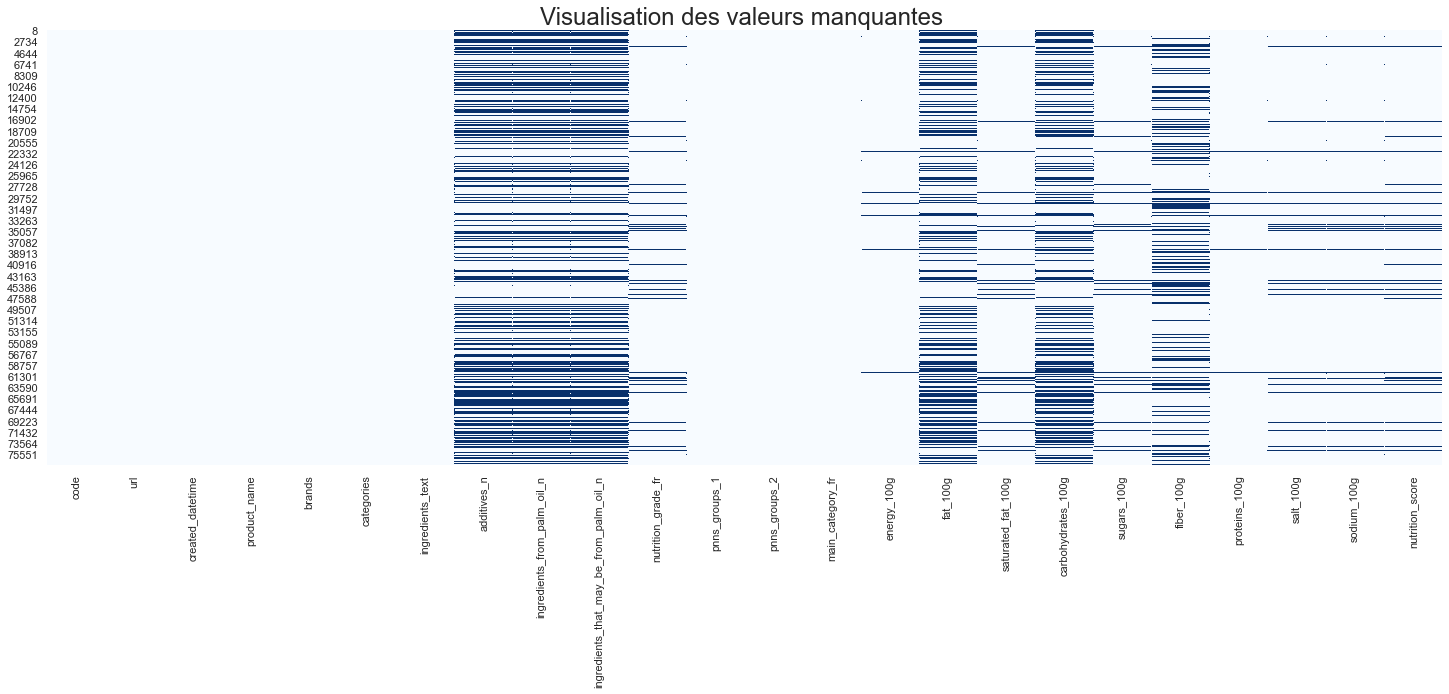

In [121]:
viz_na(df)

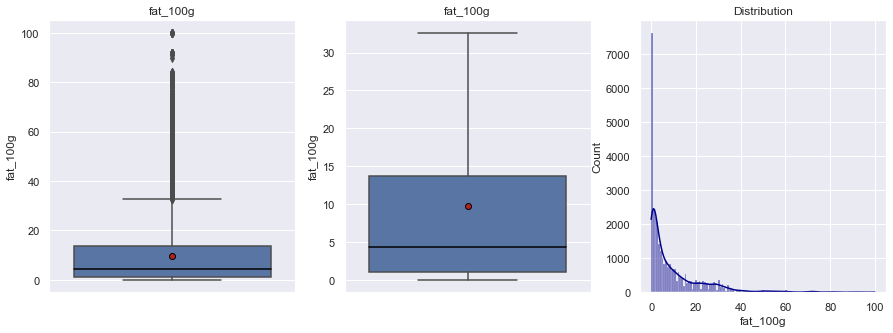

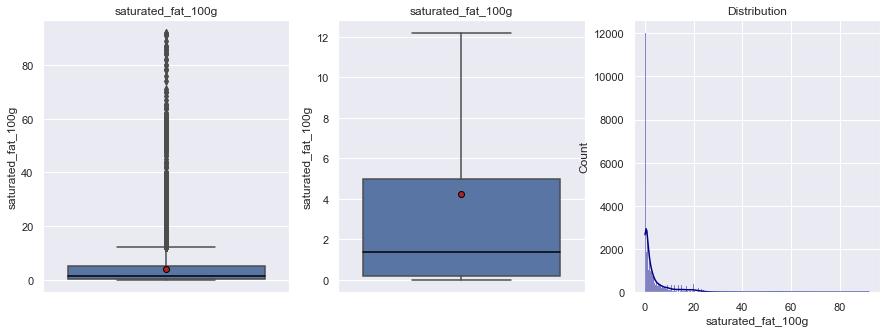

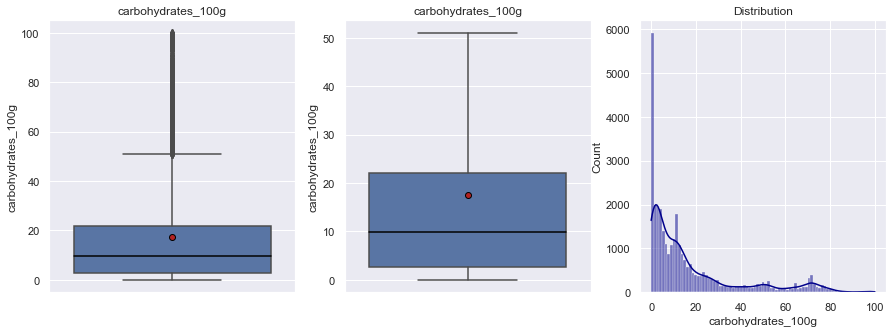

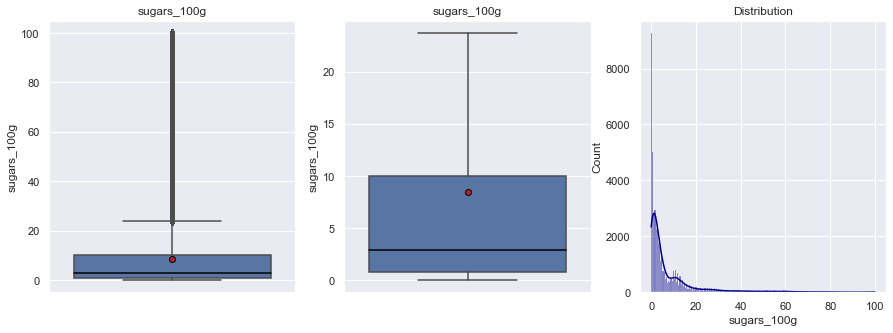

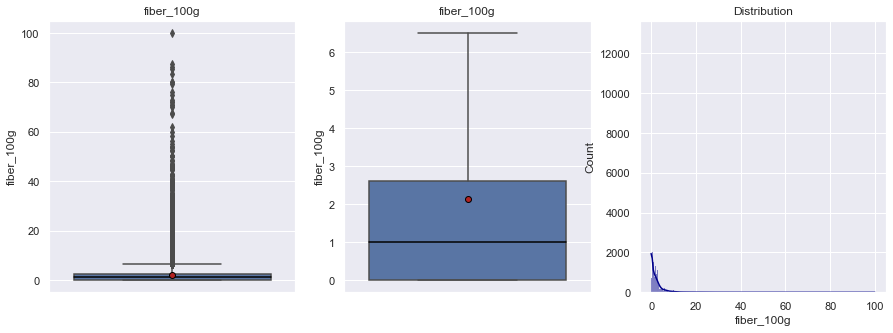

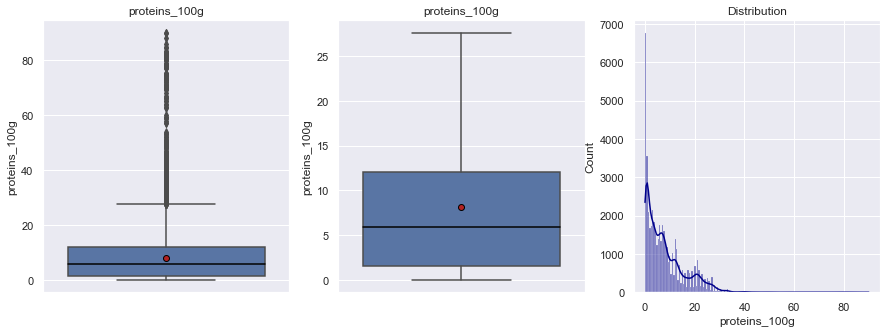

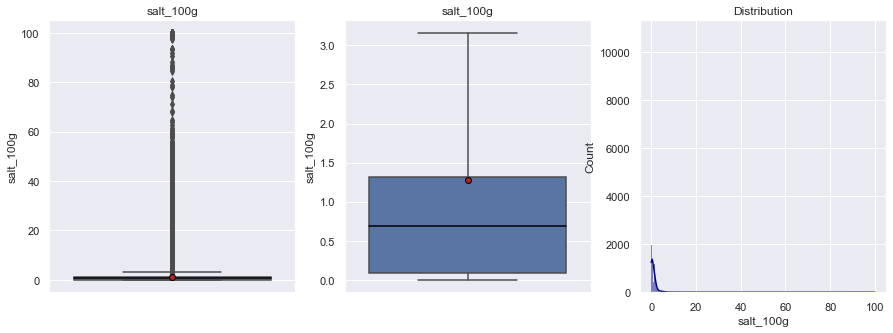

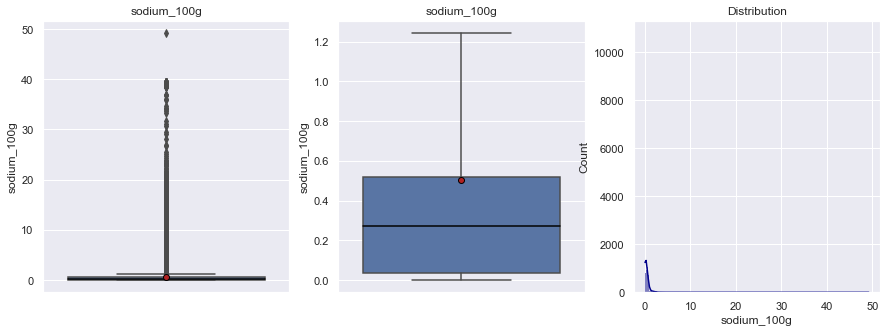

In [122]:
for m in labels_100g:
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    # Propriétés graphiques     
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    sns.boxplot( y=df[m], showfliers=True,medianprops=medianprops, showmeans=True, meanprops=meanprops)
    plt.title(m)
    plt.ylabel(m)
    plt.subplot(1,3,2)
    # Propriétés graphiques     
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    sns.boxplot( y=df[m], showfliers=False,medianprops=medianprops, showmeans=True, meanprops=meanprops)
    plt.title(m)
    plt.ylabel(m)

    plt.subplot(1,3,3)
    sns.histplot(df[m], kde = True, color='Darkblue')
    plt.title("Distribution")
    plt.xlabel(m)
    plt.show()

In [123]:
#vérifions mathématiquement la  présence d' outliers
for i in labels_100g:
    # IQR
    Q1 = np.percentile(df[labels_100g], 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(df[labels_100g], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
 
    
 
    # Upper bound
    upper = np.where(df[labels_100g] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df[labels_100g] <= (Q1-1.5*IQR))
 
    ''' Removing the Outliers '''
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
    print('---------------------------')
    print('variable :',i)
    print('---------------------------')
    print("Old Shape: ", df.shape)
    print("New Shape: ", df.shape)

---------------------------
variable : fat_100g
---------------------------
Old Shape:  (49903, 24)
New Shape:  (49903, 24)
---------------------------
variable : saturated_fat_100g
---------------------------
Old Shape:  (49903, 24)
New Shape:  (49903, 24)
---------------------------
variable : carbohydrates_100g
---------------------------
Old Shape:  (49903, 24)
New Shape:  (49903, 24)
---------------------------
variable : sugars_100g
---------------------------
Old Shape:  (49903, 24)
New Shape:  (49903, 24)
---------------------------
variable : fiber_100g
---------------------------
Old Shape:  (49903, 24)
New Shape:  (49903, 24)
---------------------------
variable : proteins_100g
---------------------------
Old Shape:  (49903, 24)
New Shape:  (49903, 24)
---------------------------
variable : salt_100g
---------------------------
Old Shape:  (49903, 24)
New Shape:  (49903, 24)
---------------------------
variable : sodium_100g
---------------------------
Old Shape:  (49903, 24

Il n' y a pas d'outliers

####  additives_n --> nombre d'additifs

In [124]:
df['additives_n'].unique()

array([nan,  2.,  3.,  1.,  0.,  4.,  8.,  5., 14., 11., 16.,  6.,  9.,
        7., 12., 10., 13., 15., 21., 17., 18., 20., 19.])

Ce sont des variables discretes qui sont des valeurs entières.Pour imputer les valeurs manquantes il ne faut pas utiliser la moyenne qui donnerait des valeurs décimales. On peut par contre utiliser la médiane.

In [125]:
from sklearn.impute import SimpleImputer
 ### il y a 4 strategies : mean,median,most_frequent et constant
imp = SimpleImputer(missing_values=np.nan, strategy='median')  
df['additives_n_imp'] = imp.fit_transform(df['additives_n'].values.reshape(-1,1))
df['additives_n_imp'].isna().sum()

0

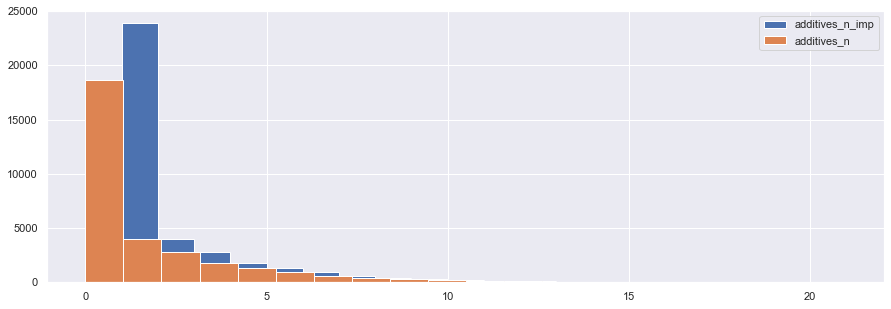

In [126]:
plt.figure(figsize = (15,5))

bins = np.arange(0, 19, 1)

plt.hist(df["additives_n_imp"], bins=bins,label='additives_n_imp')
plt.hist(df["additives_n"], bins=20,label='additives_n')
plt.legend()

plt.show()

In [127]:
df.additives_n=df.additives_n_imp
# enlever la variable additives_n_imp
df=df.drop(['additives_n_imp'],axis=1)

### ingredients_from_palm_oil_n --> nombre d'ingrédients contenant de l'huile de palme

In [128]:
df['ingredients_from_palm_oil_n'].unique()

array([nan,  0.,  1.,  2.])

In [129]:
### les valeurs sont 0 ,1 ou 2 ingrédients. si la valeur n'a pas été renseignée on considère qu'il n y en pas

In [130]:
df['ingredients_from_palm_oil_n'] = df['ingredients_from_palm_oil_n'].fillna( 0)

### ingredients_that_may_be_from_palm_oil_n  -->nombre ingrédients qui pourraient contenir de l huile de palme

In [131]:
df['ingredients_that_may_be_from_palm_oil_n'].unique()

array([nan,  0.,  1.,  2.,  3.,  4.,  5.])

In [132]:
##### même démarche si la valeur n'a pas été renseignée on considère qu'il n y en pas.

In [133]:
df['ingredients_that_may_be_from_palm_oil_n'] = df['ingredients_that_may_be_from_palm_oil_n'].fillna( 0)

## Analyse exploratoire des données numériques

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49903 entries, 8 to 77320
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   code                                     49903 non-null  object        
 1   url                                      49903 non-null  object        
 2   created_datetime                         49903 non-null  datetime64[ns]
 3   product_name                             49903 non-null  object        
 4   brands                                   49903 non-null  object        
 5   categories                               49903 non-null  object        
 6   ingredients_text                         49903 non-null  object        
 7   additives_n                              49903 non-null  float64       
 8   ingredients_from_palm_oil_n              49903 non-null  float64       
 9   ingredients_that_may_be_from_palm_oil_n

### Analyse de la donnée temporelle

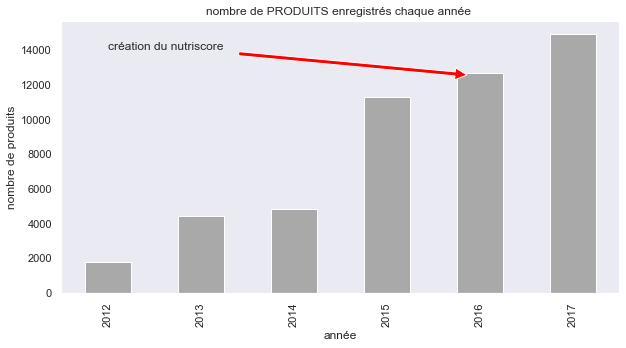

In [135]:
plt.figure(figsize = (10,5))
df.groupby(df['created_datetime'].dt.year).count()['code'].plot(kind='bar',color="darkgrey",grid=False)
plt.annotate('création du nutriscore', xy=(4, 12500), xytext=(0,14000), 
arrowprops={'facecolor':'red', 'shrink':0.05} )
plt.xlabel("année")
plt.ylabel("nombre de produits")
plt.title('nombre de PRODUITS enregistrés chaque année ')
plt.show();

Il y a une forte augmentation des enregistrements produits à partir de 2015 .Le nutri-score a été proposé en 2014 et mis en place à l'initiative du gouvernement français en 2016 dans le cadre de la loi de modernisation du système de santé.

### Analyse des variables nutritionnelles

In [136]:
labels_100g

['fat_100g',
 'saturated_fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [137]:
data=df[['energy_100g']+labels_100g]

In [138]:
data.describe()

energy_100g      fat_100g  saturated_fat_100g  carbohydrates_100g  \
count  49354.000000  33022.000000        47485.000000        32602.000000   
mean     911.841588      9.801165            4.226557           17.438610   
std      667.606963     13.045524            6.843635           21.291507   
min        0.000000      0.000000            0.000000            0.000000   
25%      350.000000      1.000000            0.200000            2.600000   
50%      766.000000      4.400000            1.400000            9.850000   
75%     1423.000000     13.700000            5.000000           22.000000   
max     3700.000000    100.000000           92.000000          100.000000   

        sugars_100g    fiber_100g  proteins_100g     salt_100g   sodium_100g  
count  47566.000000  35500.000000   49224.000000  47679.000000  47677.000000  
mean       8.429909      2.128939       8.096394      1.274276      0.501909  
std       14.144228      4.148441       8.205208      4.508529      1.780119  
min        0.000000      0.000000       0.000000      0.000000      0.000000  
25%        0.800000      0.000000       1.600000      0.090000      0.035433  
50%        2.900000      1.000000       5.900000      0.690000      0.271654  
75%       10.000000      2.600000      12.000000      1.320000      0.519685  
max      100.000000    100.000000      90.000000    100.000000     49.212598

In [139]:
def correlation_matrice(df):

    mask=np.triu(np.ones_like(data.corr(),dtype=bool))
    sns.heatmap(data.corr(),mask=mask,center=0,cmap='RdBu',linewidths=1,annot=True,fmt='.2f',vmin=-1,vmax=1)
    plt.title('Carte des corrélations',fontsize=15,fontweight="bold")
    plt.show()

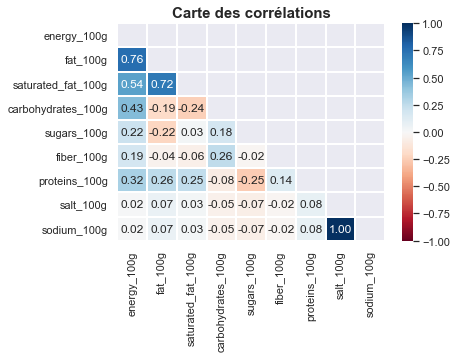

In [140]:
correlation_matrice(data)

La variable salt_100g est parfaitement corrélée avec la variable sodium_100g. Il n'y a pas lieu de conserver les 2 variables.

In [141]:
df=df.drop(['salt_100g'],axis=1)  
data=data.drop(['salt_100g'],axis=1)


In [142]:
labels_100g.remove('salt_100g')

In [143]:
data.notnull().sample()

energy_100g  fat_100g  saturated_fat_100g  carbohydrates_100g  \
21442         True      True                True                True   

       sugars_100g  fiber_100g  proteins_100g  sodium_100g  
21442         True       False           True         True

energy_100g
-------------------
KstestResult(statistic=0.8303434034638899, pvalue=0.0)
Sample does not look Gaussian (reject H0)
*********************************************
fat_100g
-------------------
KstestResult(statistic=0.5030684901320261, pvalue=0.0)
Sample does not look Gaussian (reject H0)
*********************************************
saturated_fat_100g
-------------------
KstestResult(statistic=0.7928907453070657, pvalue=0.0)
Sample does not look Gaussian (reject H0)
*********************************************
carbohydrates_100g
-------------------
KstestResult(statistic=0.5, pvalue=0.0)
Sample does not look Gaussian (reject H0)
*********************************************
sugars_100g
-------------------
KstestResult(statistic=0.7945138942159489, pvalue=0.0)
Sample does not look Gaussian (reject H0)
*********************************************
fiber_100g
-------------------
KstestResult(statistic=0.552724823418602, pvalue=0.0)
Sample does not look Gaussian (reject H0)
**

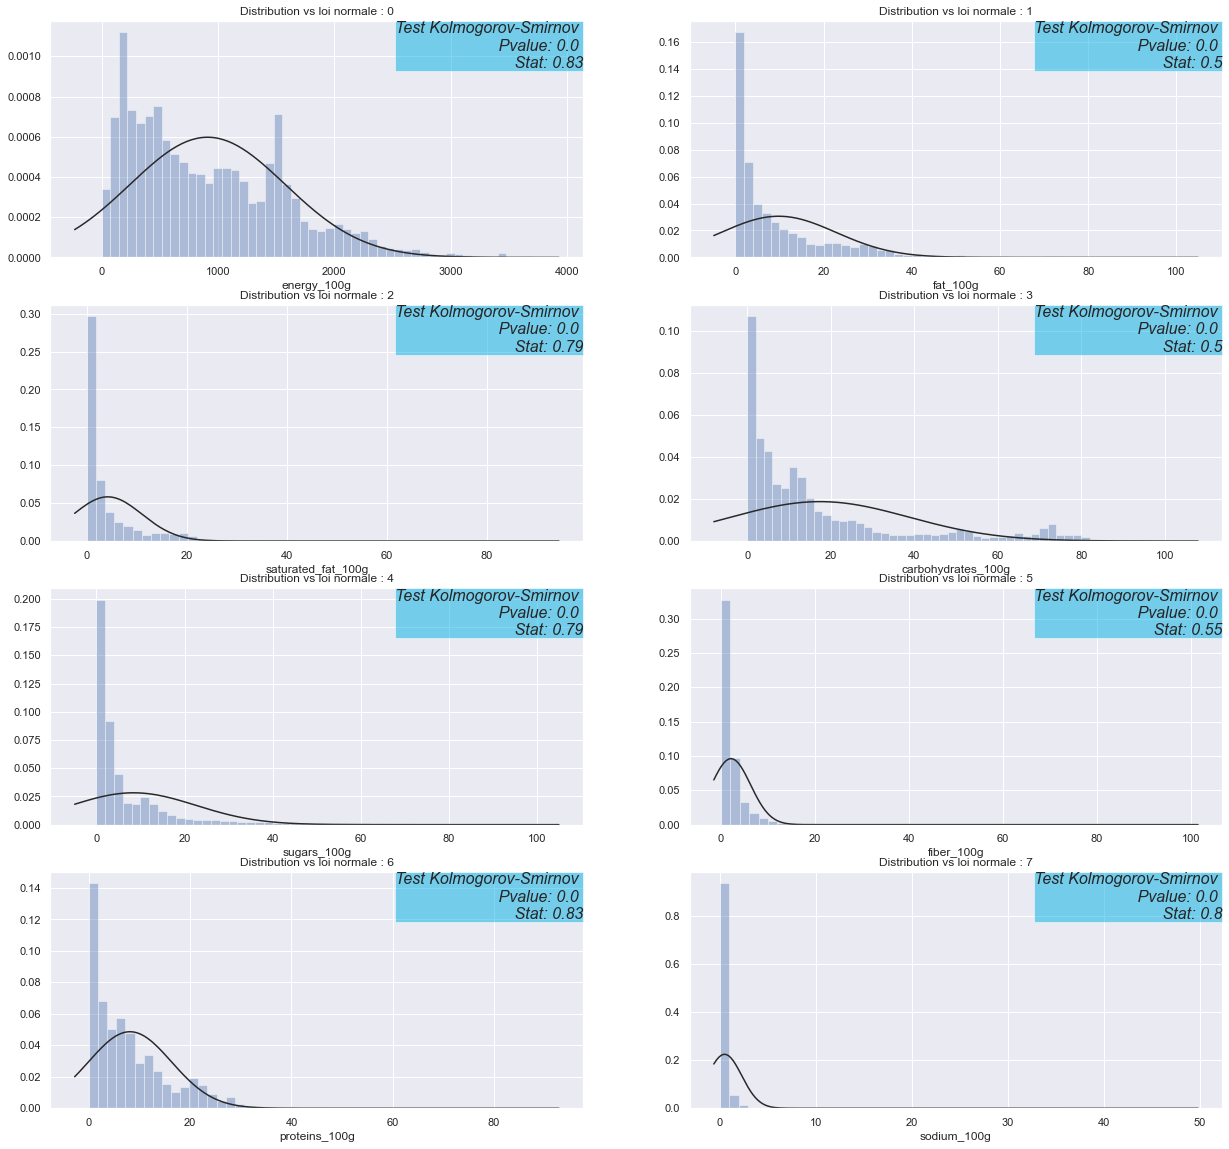

In [144]:
from scipy.stats import kstest
from numpy.random import seed
import scipy.stats as stats
from scipy.stats import norm


fig = plt.figure(figsize=(21,20))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height  


for i in enumerate(data):
    
    print(i[1])
    print('-------------------')
    #perform Kolmogorov-Smirnov test
    print(kstest(data[i[1]].notnull(), 'norm'))
    stat,p=kstest(data[i[1]].notnull(), 'norm')
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    print('*********************************************')
for i in enumerate(data):
   
    fig.add_subplot(4,2,i[0]+1)
    ax=sns.distplot(data[i[1]], fit=stats.norm,  kde=False)    
    kstest = stats.kstest(data[i[1]].notnull(), 'norm')
    
    ax.set_title("Distribution vs loi normale : {}".format(i[0]))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 16,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})


Test de kolmogrov-smirnov:\
H0 : la distribution de la variable est normale.\
H1 : la distribution n'est pas normale. Si p < alpha, on rejette H0, on conclut que la distribution ne suit pas une loi normale.

Les distributions représentées ci-dessus ne suivent pas une loi normale.

In [145]:
# je vais utiliser KNN pour imputer les  variables manquantes
from sklearn.impute import KNNImputer

# On entraine le modèle d'imputation sur un échantillon de données
knn_features = data.columns
sample_data = df[knn_features].sample(frac=0.20, random_state=1)
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan).fit(sample_data)


In [146]:
# Puis on applique le modèle sur l'ensemble des données

data_imputed = imputer.transform(df[knn_features])

df_data_imputed = pd.DataFrame(data_imputed, columns=knn_features)


On vérifie les distributions obtenues après knn

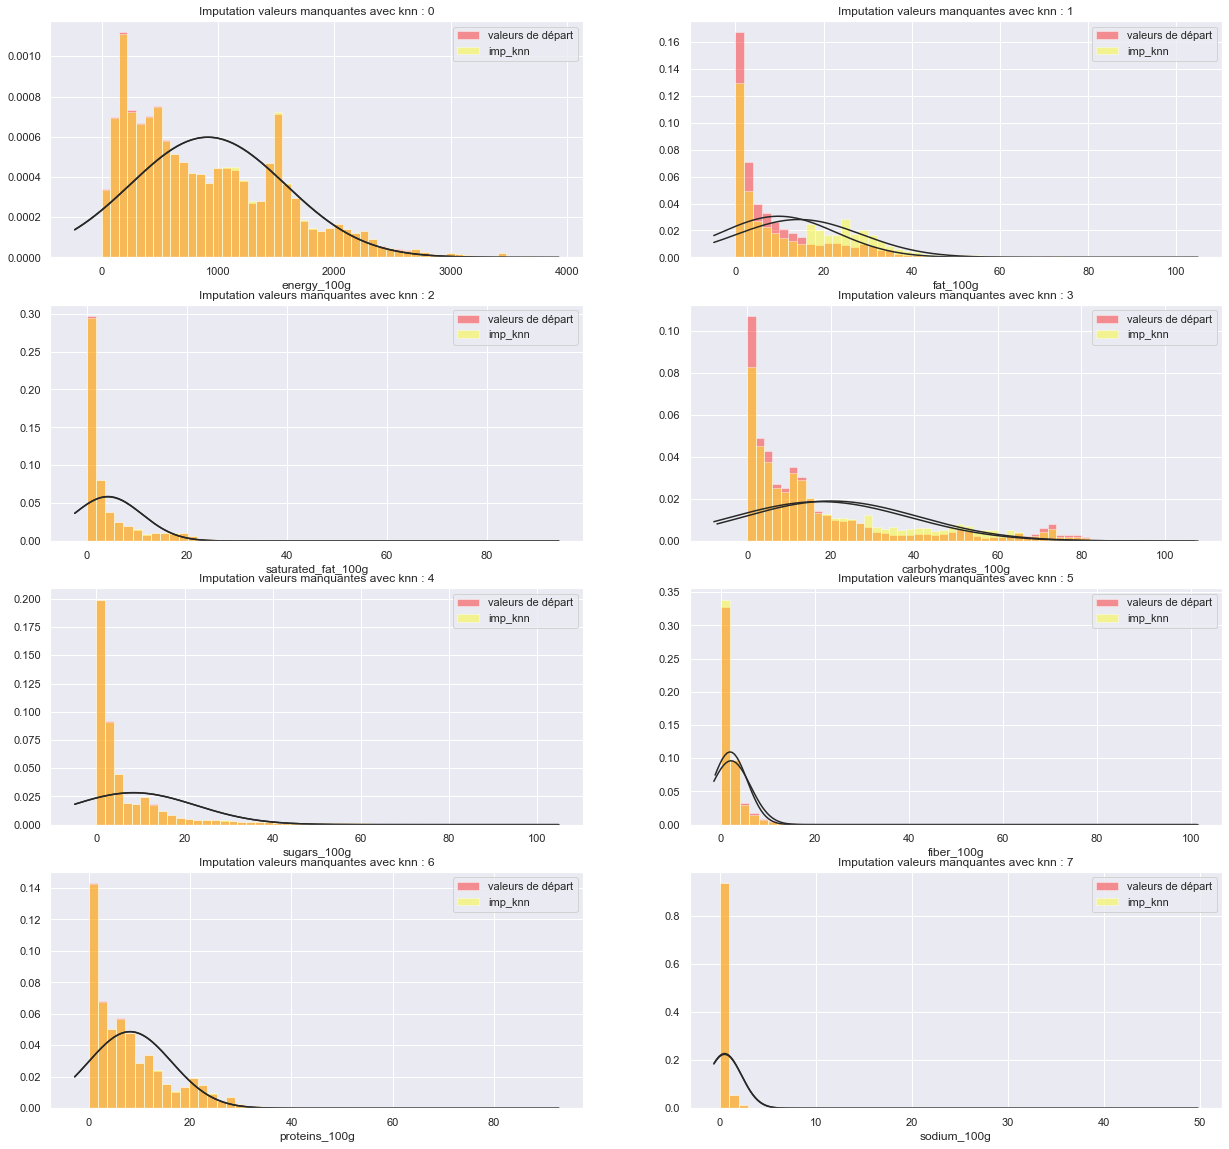

In [147]:

fig = plt.figure(figsize=(21,20))
for i in enumerate(data):
    fig.add_subplot(4,2,i[0]+1)
    ax=sns.distplot(data[i[1]], fit=stats.norm, kde=False,color="red",label= 'valeurs de départ')
    ax=sns.distplot(df_data_imputed[i[1]], fit=stats.norm, kde=False,color="yellow",label="imp_knn")
    ax.set_title("Imputation valeurs manquantes avec knn : {}".format(i[0]))
    plt.legend()



L'imputation des valeurs manquantes n'a pas modifié les distributions. Les courbes sont pratiquement identiques avant et après transformation (sauf pour la variable fat_100g)
Nous pouvons charger les valeurs imputées dans notre dataframe df

In [148]:
for col_knn in knn_features:
    df[col_knn] = df_data_imputed[col_knn].values

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49903 entries, 8 to 77320
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   code                                     49903 non-null  object        
 1   url                                      49903 non-null  object        
 2   created_datetime                         49903 non-null  datetime64[ns]
 3   product_name                             49903 non-null  object        
 4   brands                                   49903 non-null  object        
 5   categories                               49903 non-null  object        
 6   ingredients_text                         49903 non-null  object        
 7   additives_n                              49903 non-null  float64       
 8   ingredients_from_palm_oil_n              49903 non-null  float64       
 9   ingredients_that_may_be_from_palm_oil_n

In [150]:
df.describe()

additives_n  ingredients_from_palm_oil_n  \
count  49903.000000                 49903.000000   
mean       1.544737                     0.019738   
std        2.063032                     0.140677   
min        0.000000                     0.000000   
25%        0.000000                     0.000000   
50%        1.000000                     0.000000   
75%        2.000000                     0.000000   
max       21.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n   energy_100g      fat_100g  \
count                             49903.000000  49903.000000  49903.000000   
mean                                  0.090616    915.786831     14.428286   
std                                   0.363240    667.459506     14.174614   
min                                   0.000000      0.000000      0.000000   
25%                                   0.000000    352.000000      1.800000   
50%                                   0.000000    774.000000     10.300000   
75%                                   0.000000   1427.000000     24.880000   
max                                   5.000000   3700.000000    100.000000   

       saturated_fat_100g  carbohydrates_100g   sugars_100g    fiber_100g  \
count        49903.000000        49903.000000  49903.000000  49903.000000   
mean             4.261046           20.141817      8.430075      1.936809   
std              6.793057           20.983573     14.075011      3.643399   
min              0.000000            0.000000      0.000000      0.000000   
25%              0.260000            3.800000      0.840000      0.000000   
50%              1.400000           12.000000      3.000000      1.000000   
75%              5.200000           29.890000     10.000000      2.500000   
max             92.000000          100.000000    100.000000    100.000000   

       proteins_100g   sodium_100g  nutrition_score  
count   49903.000000  49903.000000     46739.000000  
mean        8.124220      0.500439         6.766405  
std         8.192937      1.751975         8.415483  
min         0.000000      0.000000       -15.000000  
25%         1.600000      0.039370         0.000000  
50%         6.000000      0.275591         5.000000  
75%        12.000000      0.530157        13.000000  
max        90.000000     49.212598        36.000000

In [151]:
df= df.reset_index(drop=True)
df_=df.copy()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49903 entries, 0 to 49902
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   code                                     49903 non-null  object        
 1   url                                      49903 non-null  object        
 2   created_datetime                         49903 non-null  datetime64[ns]
 3   product_name                             49903 non-null  object        
 4   brands                                   49903 non-null  object        
 5   categories                               49903 non-null  object        
 6   ingredients_text                         49903 non-null  object        
 7   additives_n                              49903 non-null  float64       
 8   ingredients_from_palm_oil_n              49903 non-null  float64       
 9   ingredients_that_may_be_from_palm_oil_n

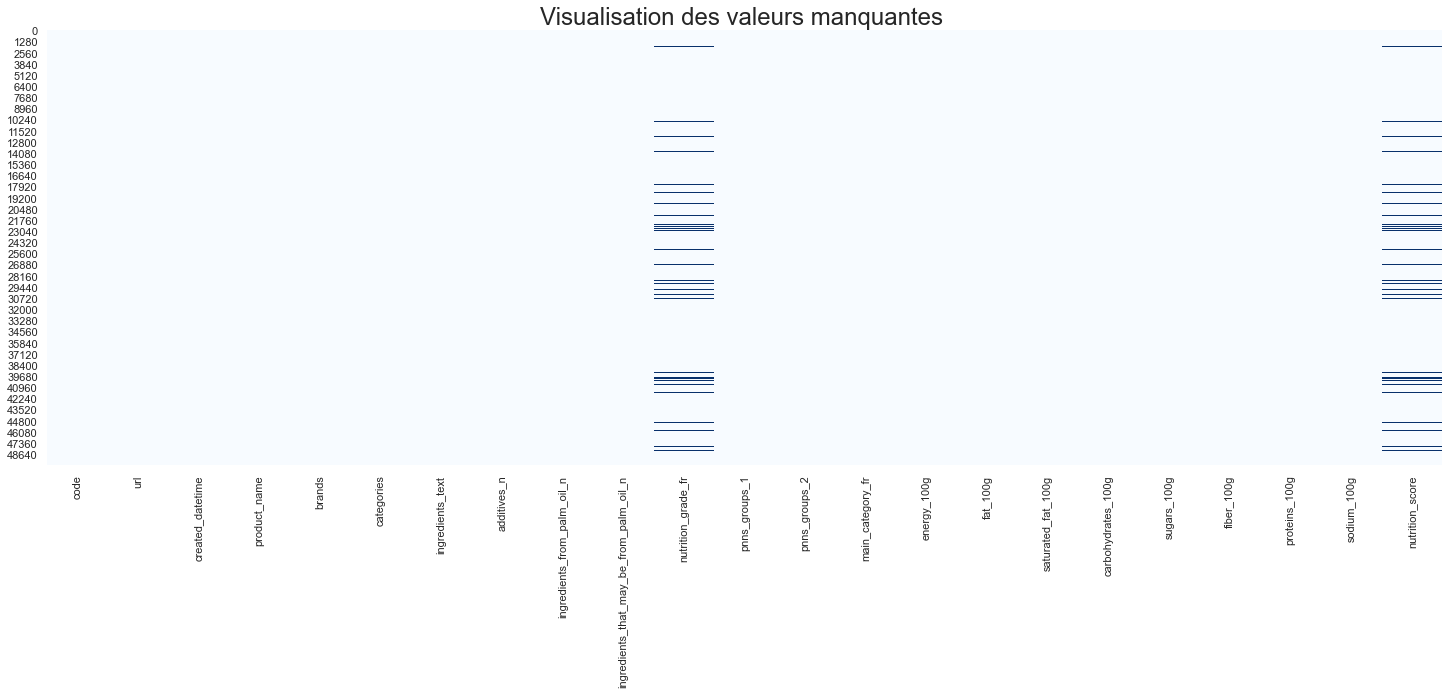

In [153]:
viz_na(df)

In [154]:
type_var(df)

Variables
---------


Nombre     % 
float64             12  52.17
object              10  43.48
datetime64[ns]       1   4.35

In [155]:
cont(df)

taille totale du jeu de donnees : 1147769

nombre de lignes : 49903                         nombre de colonnes : 23

nombre de valeurs manquantes : 6328           % de valeurs manquantes : 0.55


In [ ]:
df_.to_csv(r'C:\Users\serge\OneDrive\Documents\Documents\DATA SCIENTIST\P3\data_clean_P3.csv',index=False)